In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

%matplotlib inline

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# view all the dataframe
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Loading Raw Data

In [2]:
# Loading the data
raw_data = pd.read_csv('D:\Final Project\CarPrice_Assignment.csv')

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head()


(205, 26)


car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

# EDA 

In [3]:
# Investigate all the elements whithin each Feature 


for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature car_ID :205
The number of values for feature symboling :6 -- [-2 -1  0  1  2  3]
The number of values for feature CarName :147
The number of values for feature fueltype :2 -- ['diesel' 'gas']
The number of values for feature aspiration :2 -- ['std' 'turbo']
The number of values for feature doornumber :2 -- ['four' 'two']
The number of values for feature carbody :5 -- ['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon']
The number of values for feature drivewheel :3 -- ['4wd' 'fwd' 'rwd']
The number of values for feature enginelocation :2 -- ['front' 'rear']
The number of values for feature wheelbase :53
The number of values for feature carlength :75
The number of values for feature carwidth :44
The number of values for feature carheight :49
The number of values for feature curbweight :171
The number of values for feature enginetype :7 -- ['dohc' 'dohcv' 'l' 'ohc' 'ohcf' 'ohcv' 'rotor']
The number of values for feature cylindernumber :7 -- ['eight' 'fiv

In [4]:
# Checking for null values

raw_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Investigating Numeric values with Scatterplots

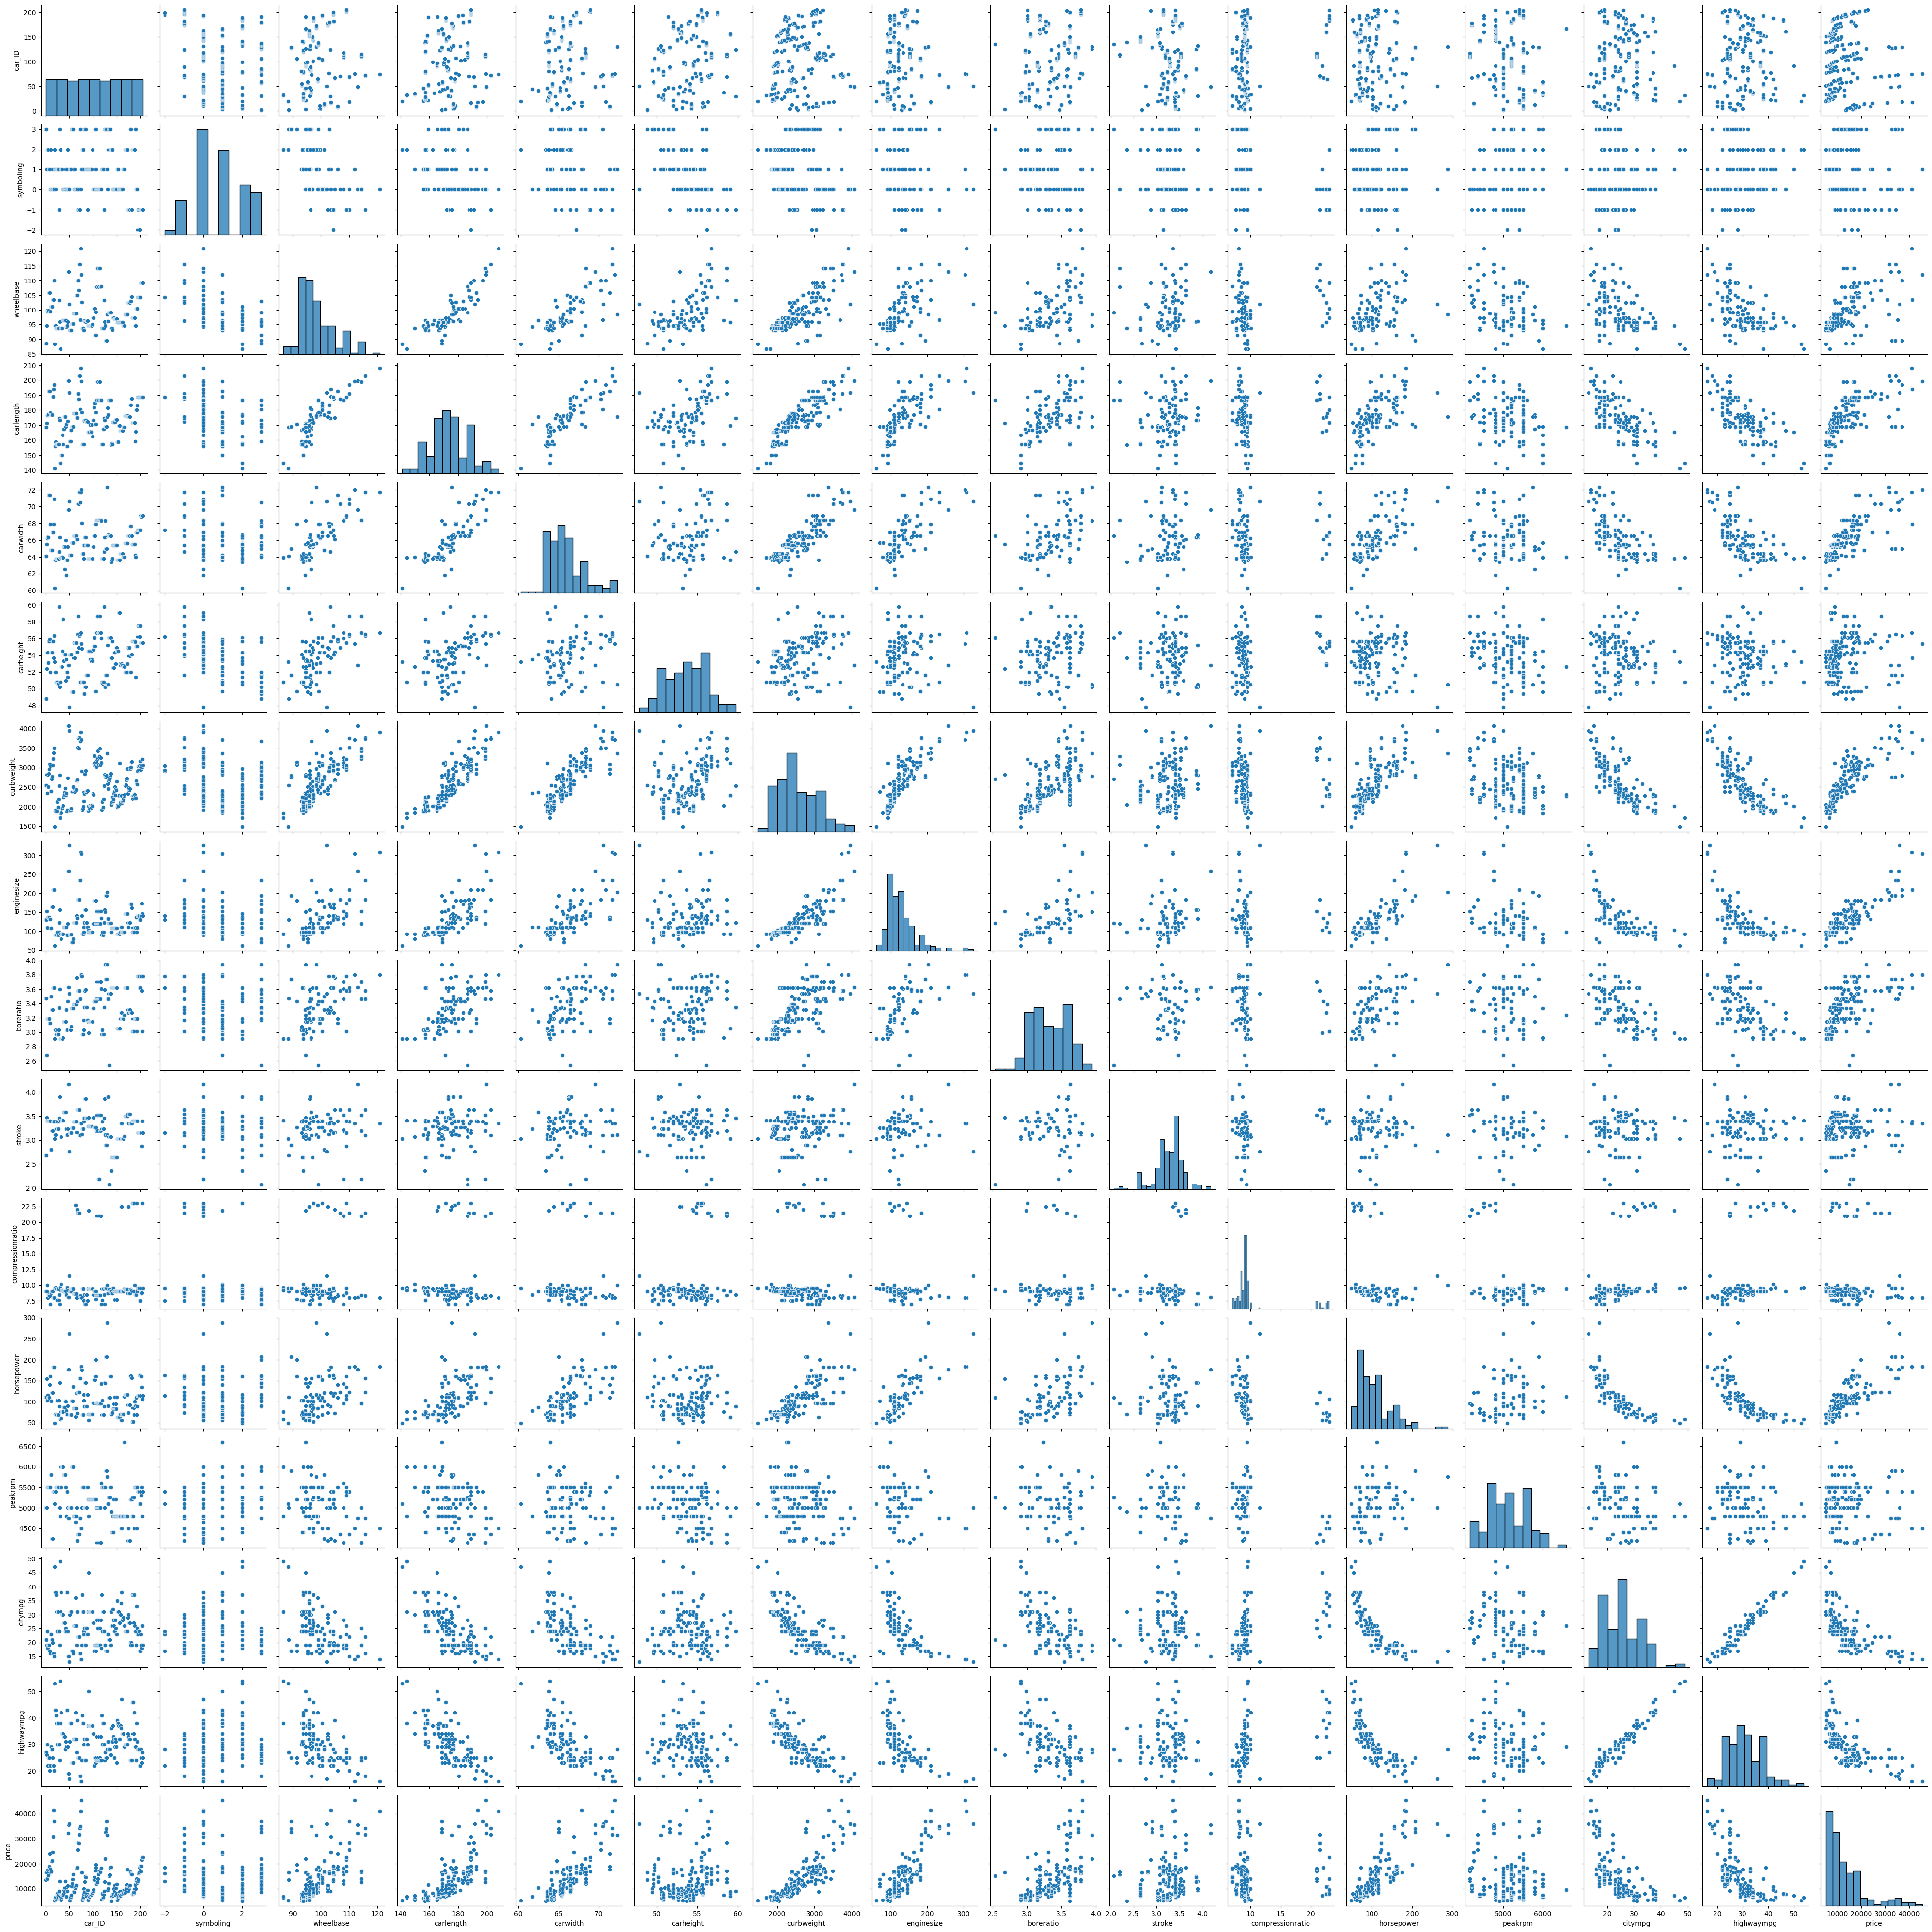

In [5]:
#1 - Visualize the data using seaborn Pairplots

g = sns.pairplot(raw_data)


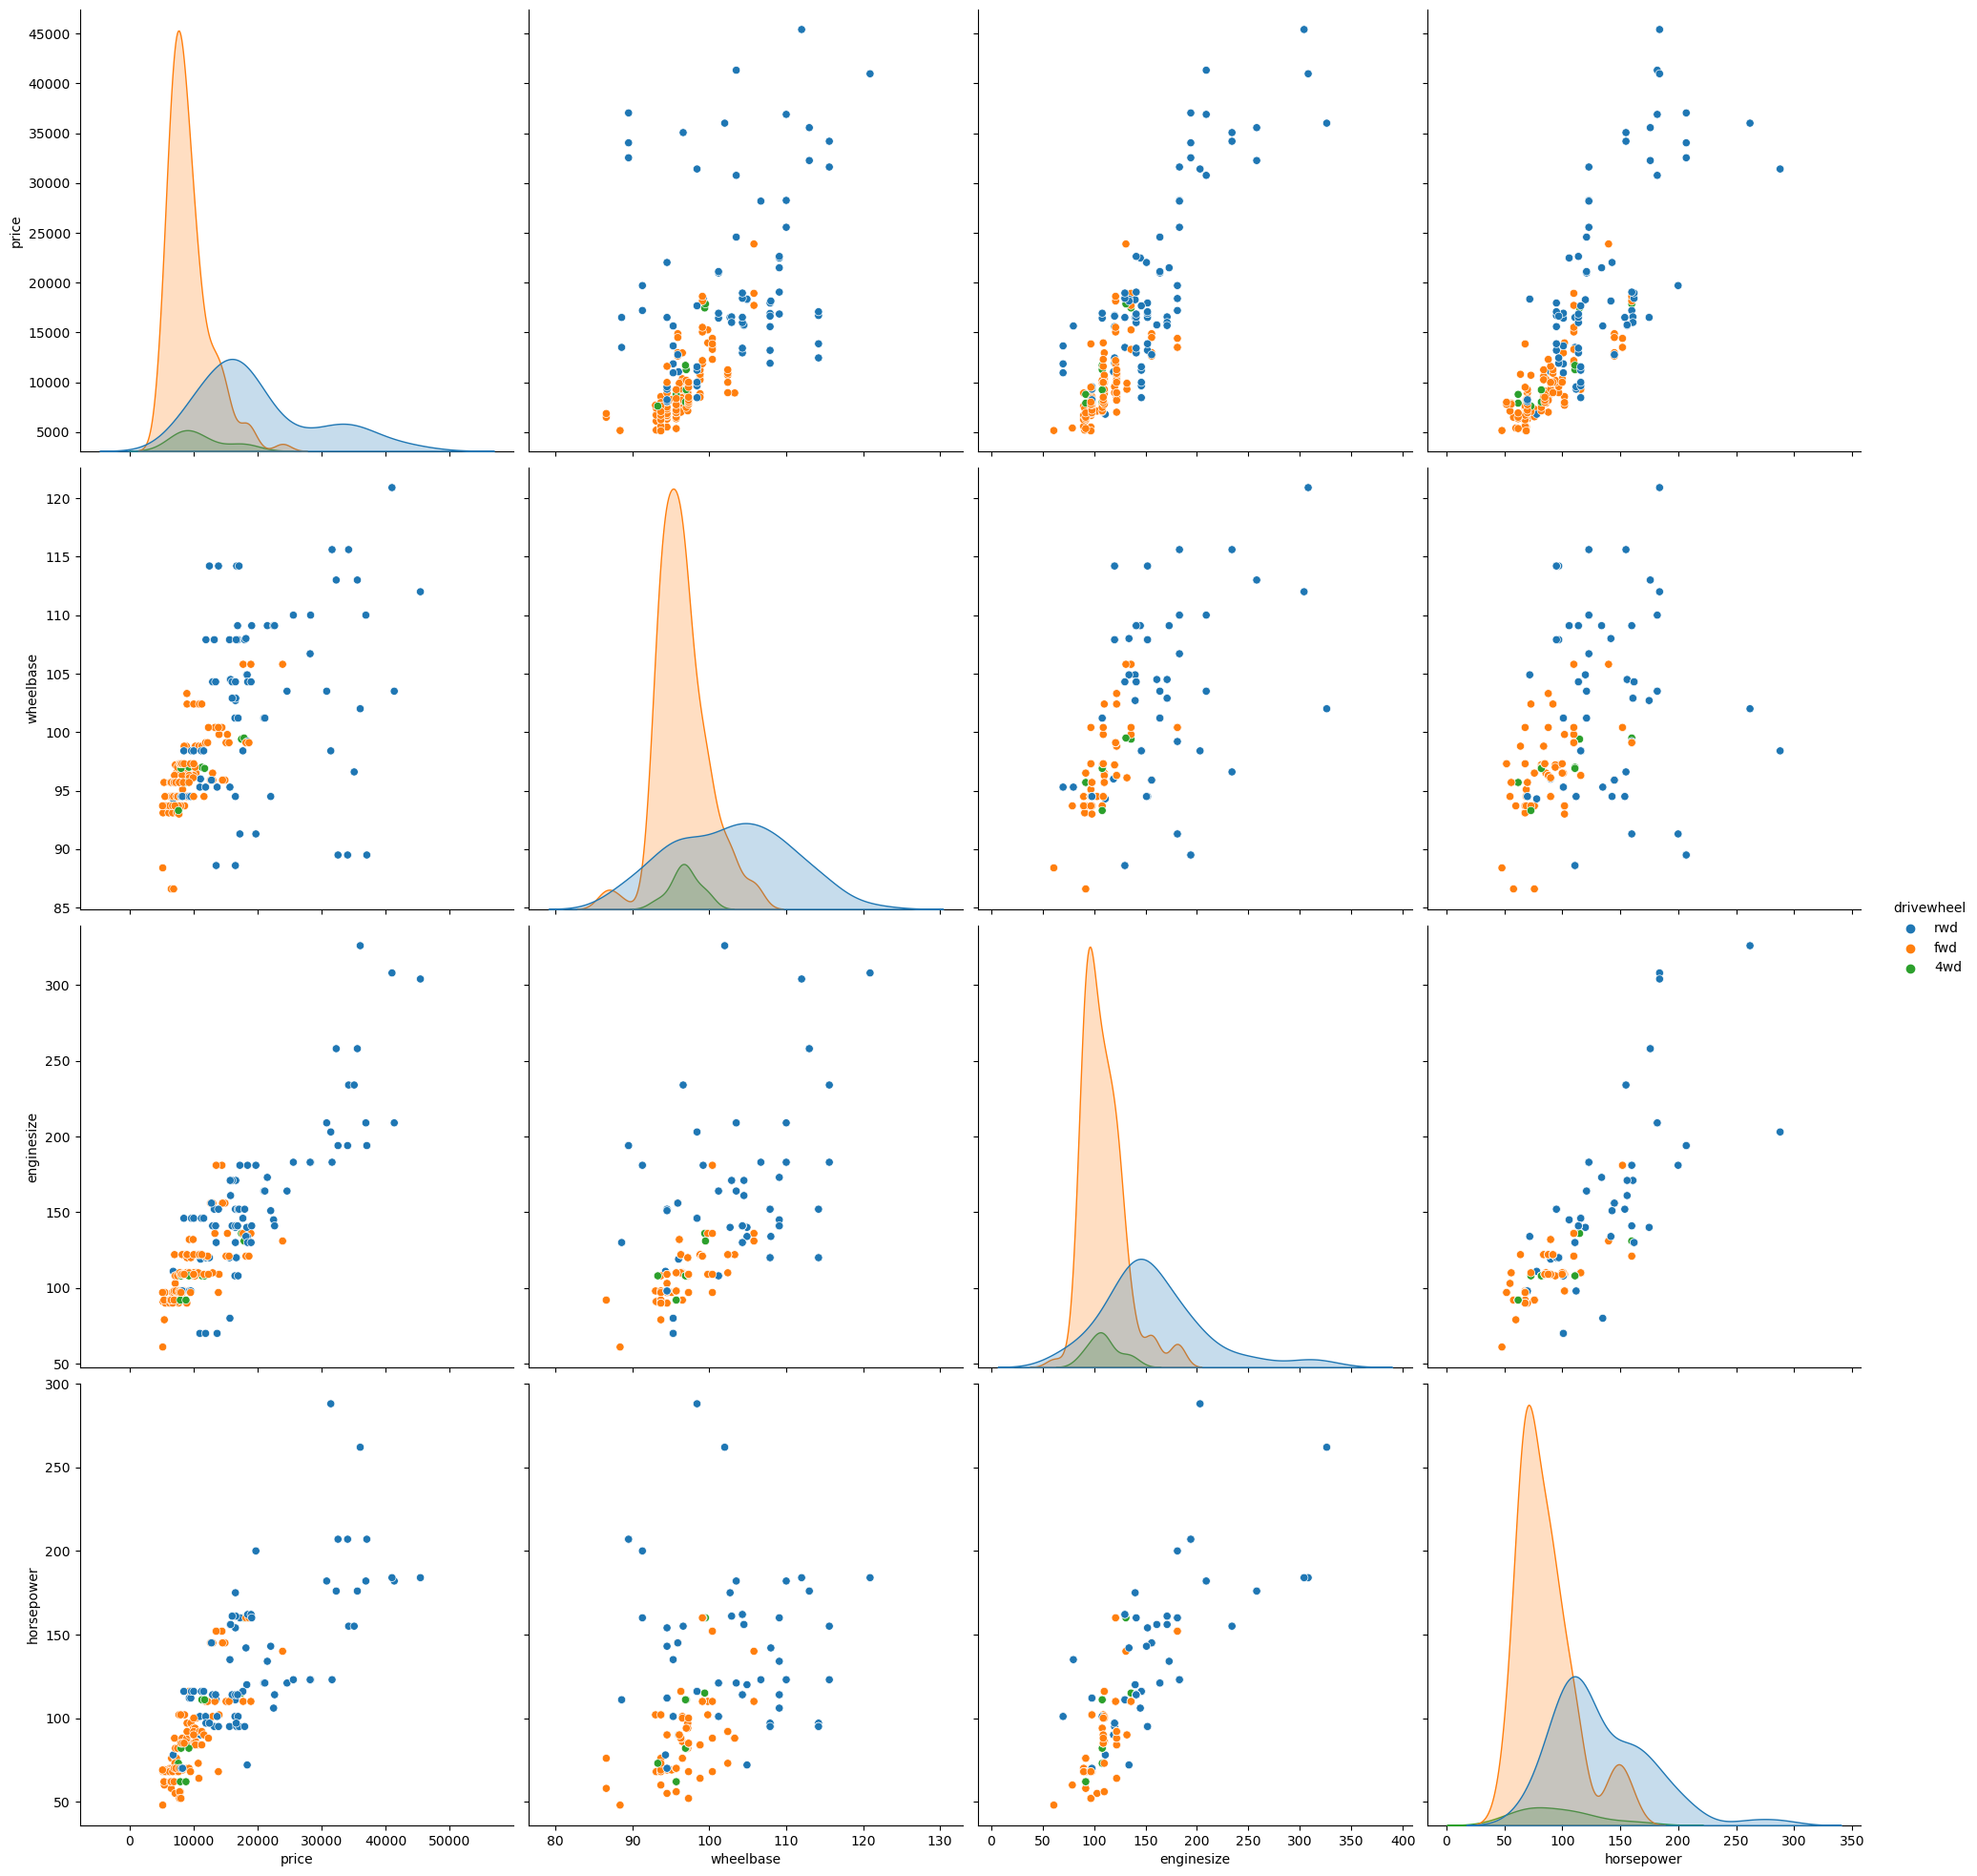

In [6]:
#2 - Visualising a Subset of our data - important features

g = sns.pairplot(raw_data[['price', 'wheelbase', 'enginesize','horsepower','drivewheel']], hue = 'drivewheel', height = 5)

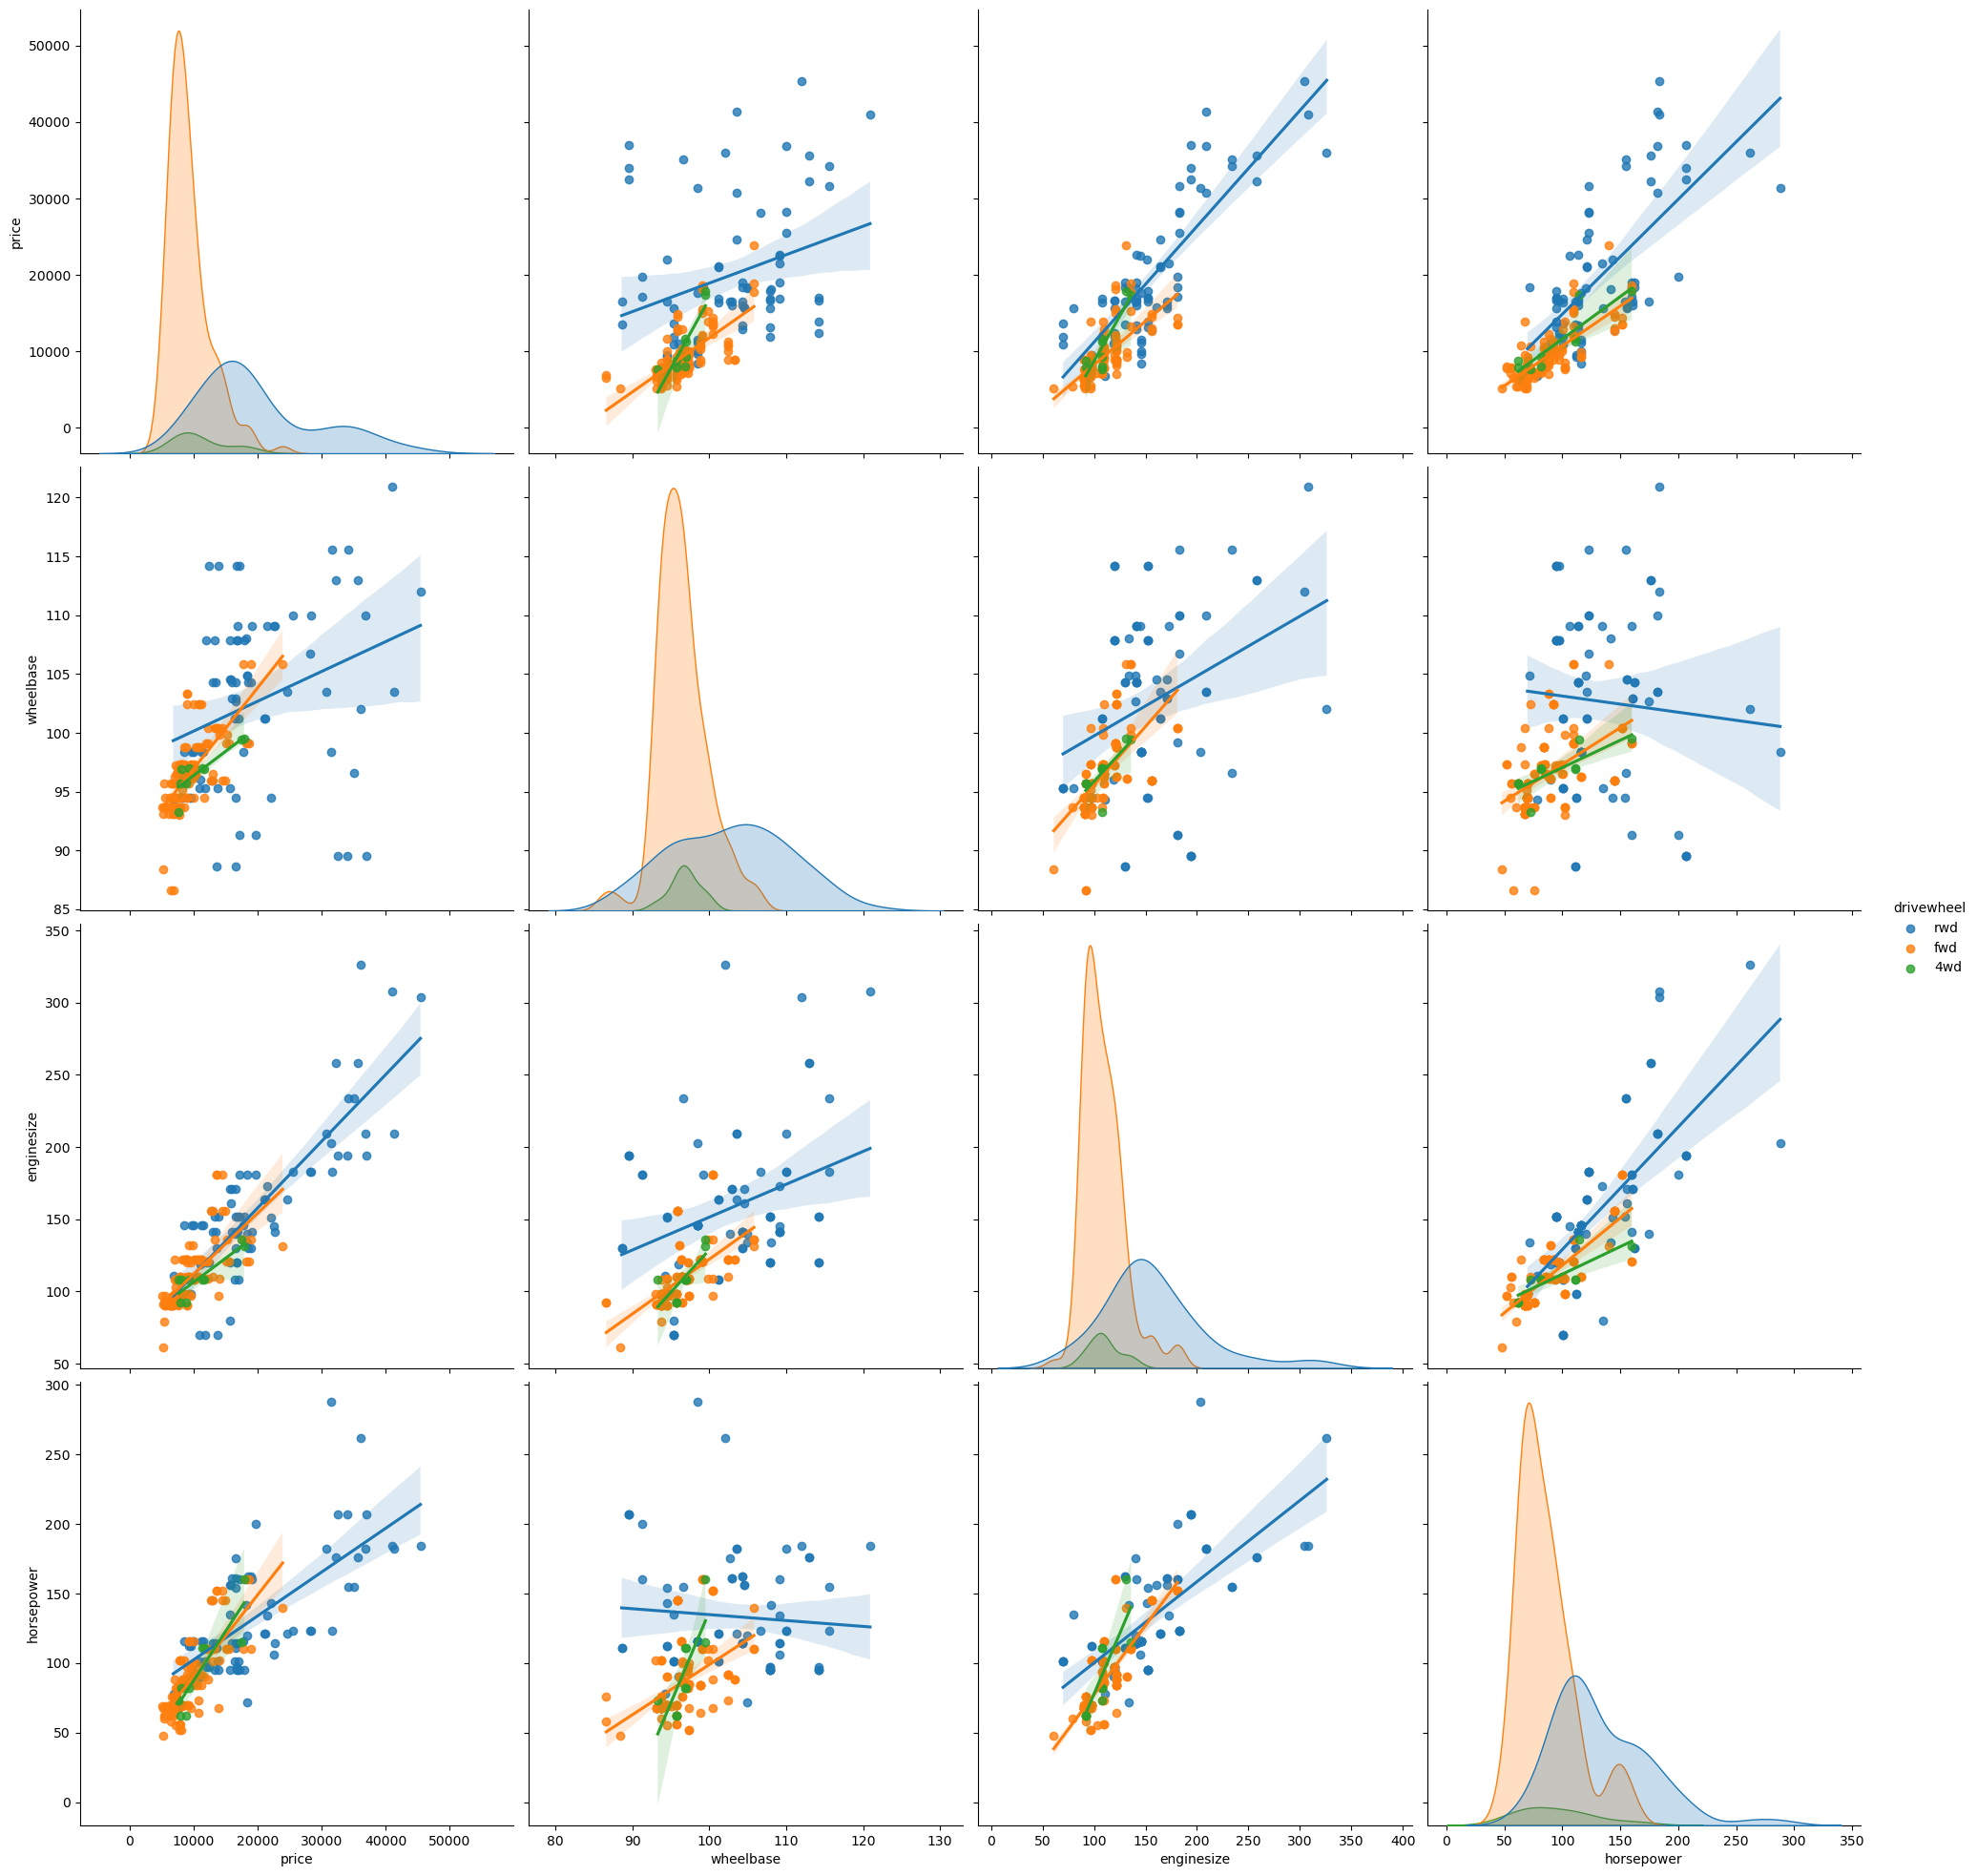

In [7]:
#3 - Visualising a Subset of our data - important features

g = sns.pairplot(raw_data[['price', 'wheelbase', 'enginesize','horsepower','drivewheel']], hue = 'drivewheel', height = 5, kind="reg")

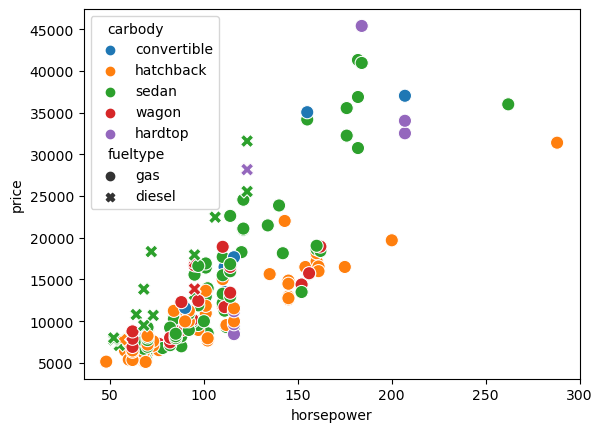

In [8]:
#4 - Relationship between price and horsepower by carbody

ax = sns.scatterplot(x="horsepower", y="price", data=raw_data, hue = 'carbody', style = 'fueltype', s=90)

# Investigating the Categorical Data

carbody         price
0  convertible  21890.500000
1      hardtop  22208.500000
2    hatchback  10376.652386
3        sedan  14344.270833
4        wagon  12371.960000

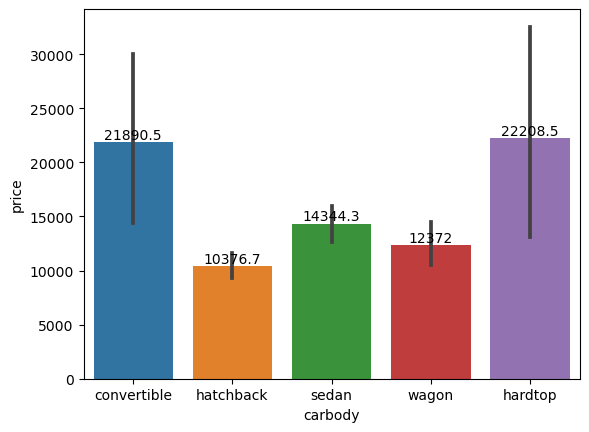

In [9]:
#5 - Average price by carbody

ax = sns.barplot(x="carbody", y="price", data=raw_data)
ax.bar_label(ax.containers[0])

# Notes: 
# 1 - the lines signify the confidence interval
# 2 - Takes mean by default

raw_data[['carbody', 'price']].groupby('carbody', as_index = False).agg({'price':'mean'})

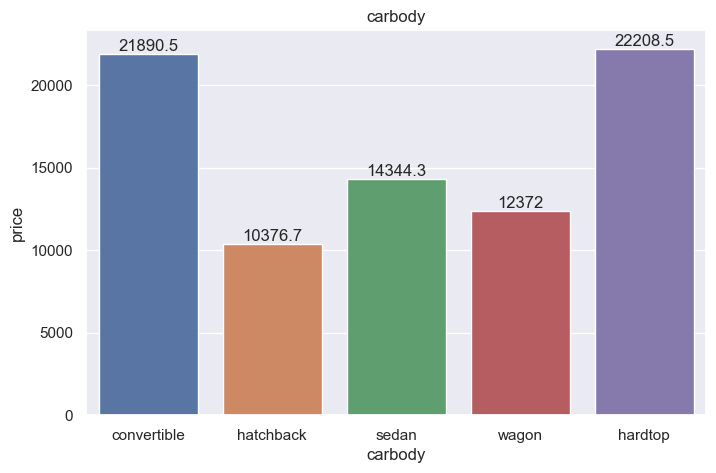

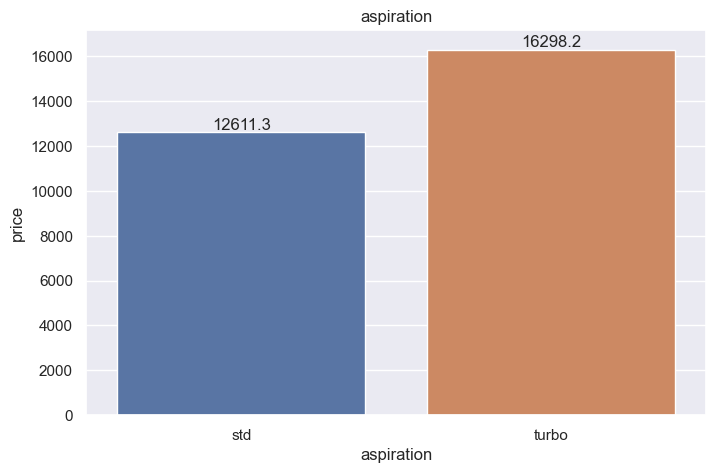

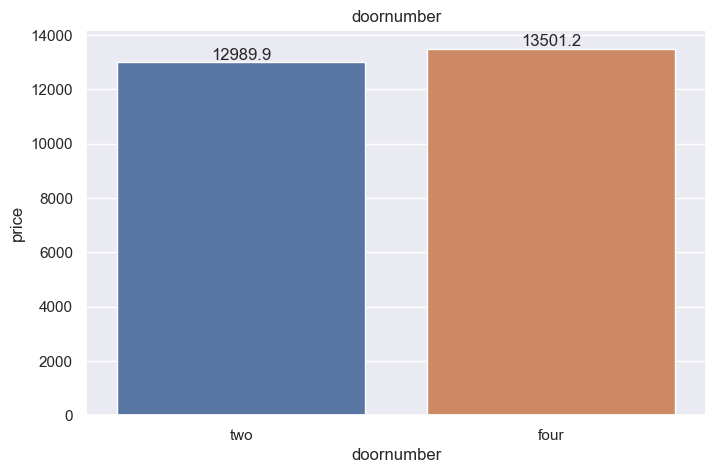

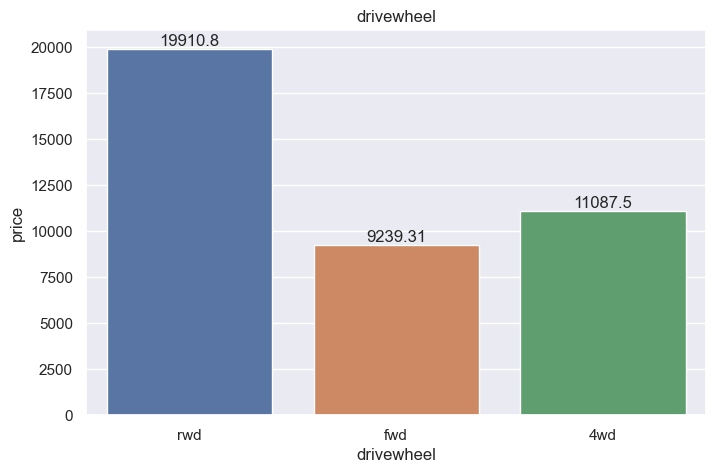

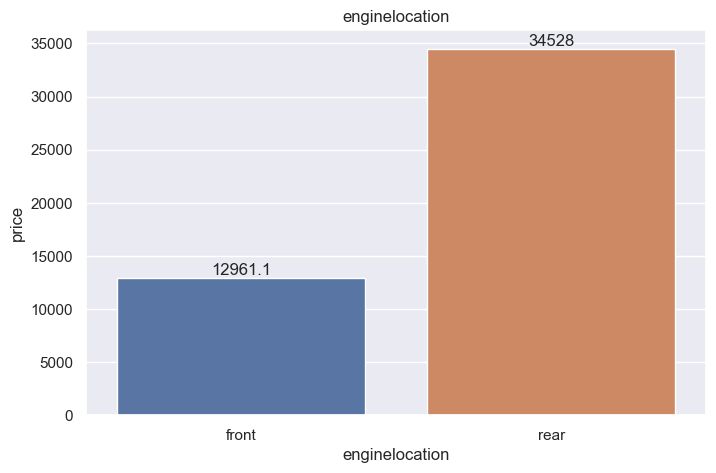

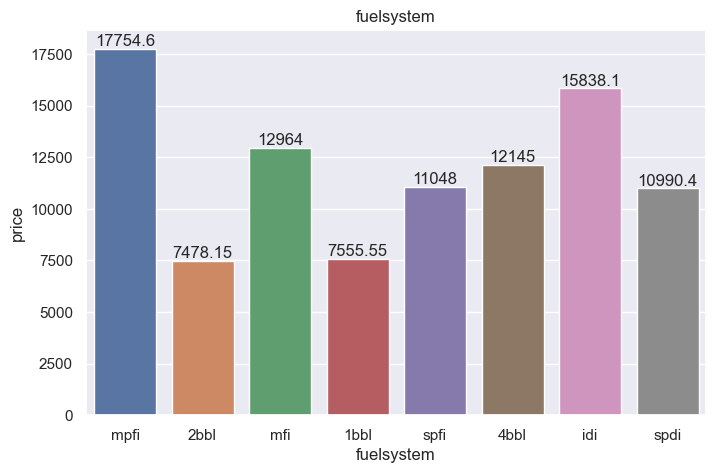

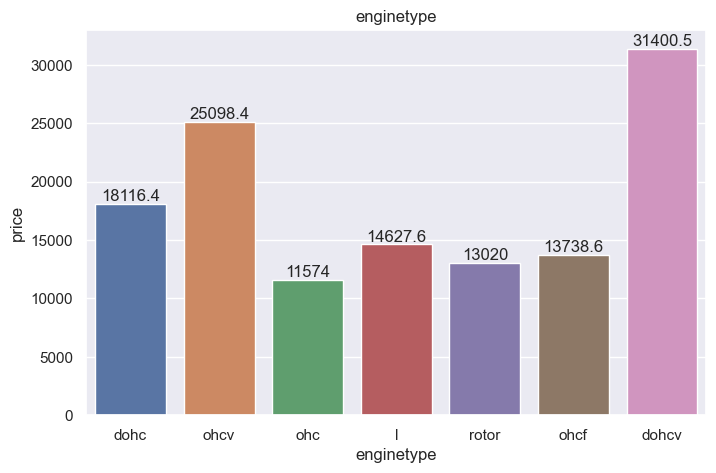

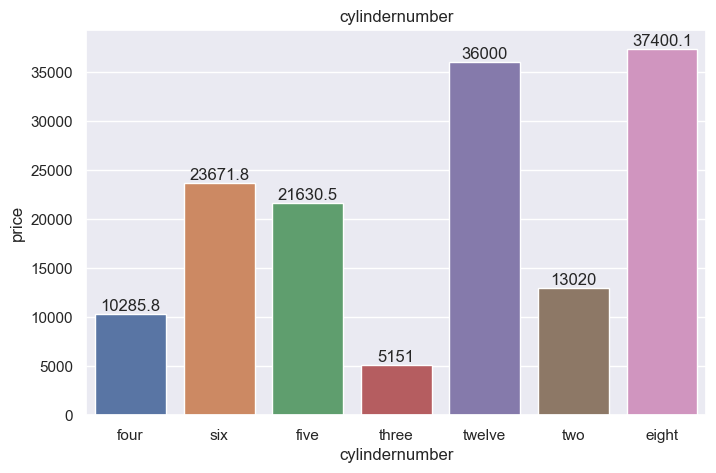

In [10]:
#6 - Total price by carbody for multible categories

categories = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype','cylindernumber']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in categories:
    
    ax = sns.barplot(x=c, y="price", data=raw_data, ci=False) #, hue = 'fueltype')
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(c)
    plt.show()

# Investigating the distribution with disti plots

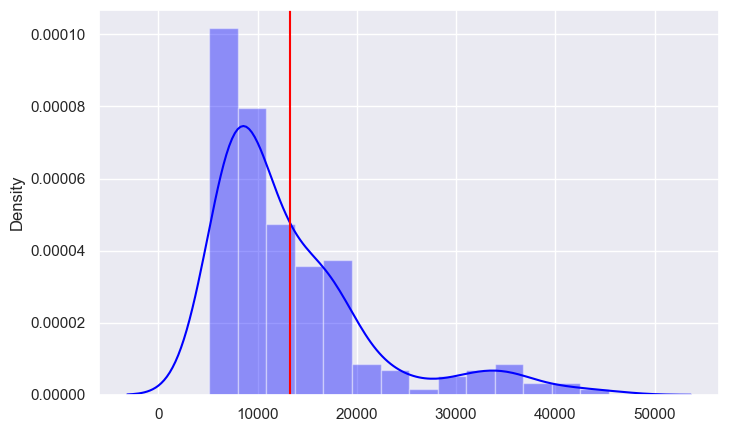

In [11]:
#7 - Investigating the distribution of price, adding the mean

x = raw_data['price'].values

sns.distplot(x, color = 'blue');

# Calculating the mean
mean = raw_data['price'].mean()

#ploting the mean
plt.axvline(mean, 0,1, color = 'red')

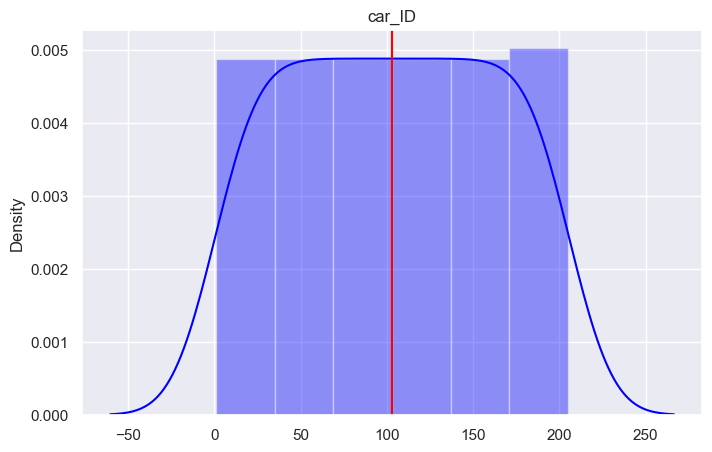

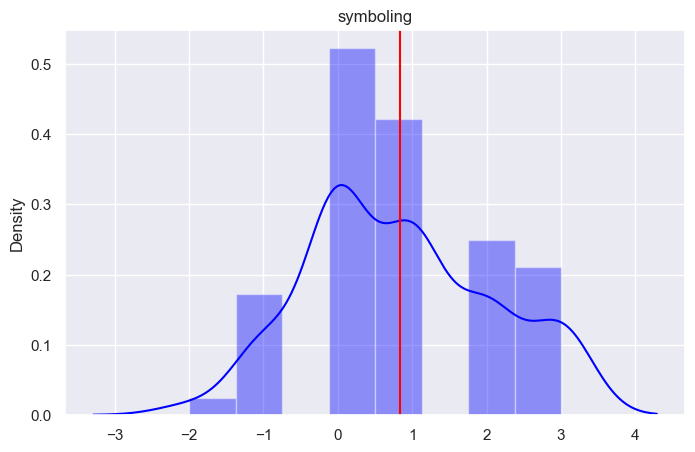

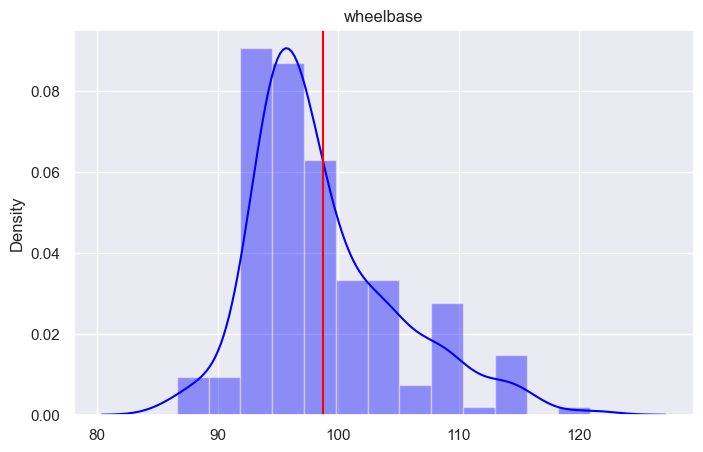

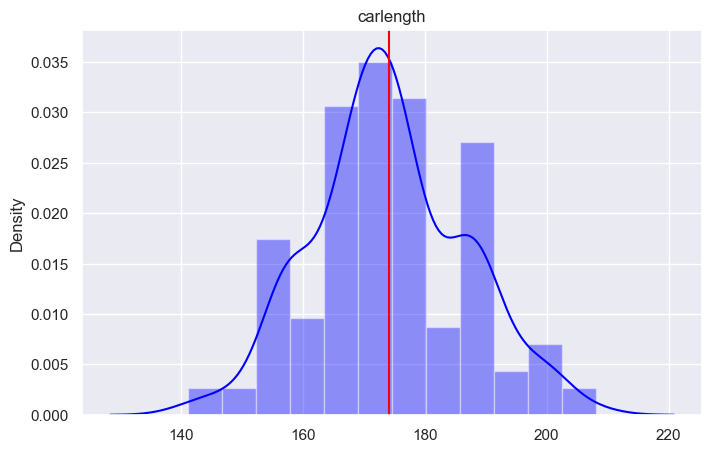

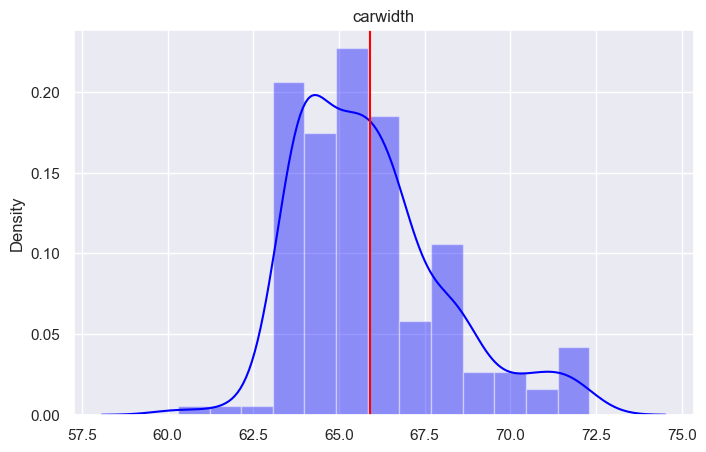

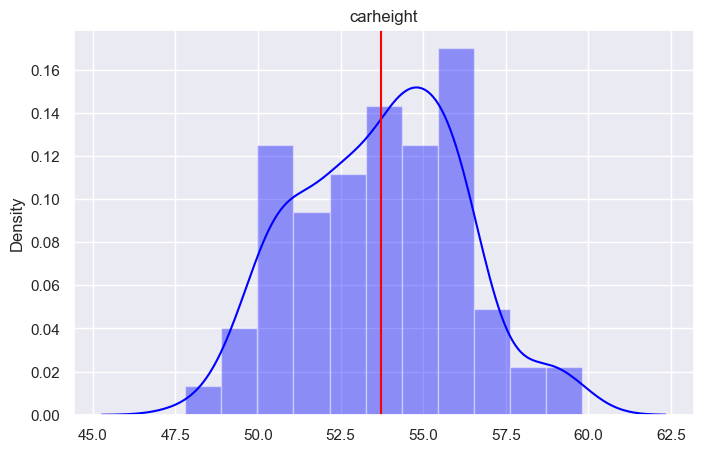

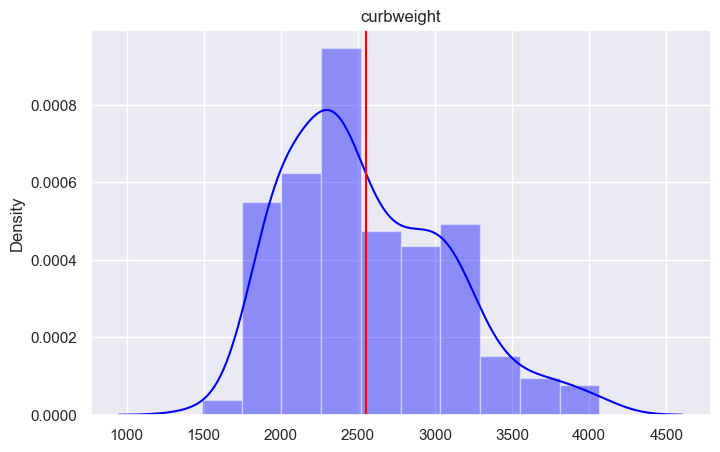

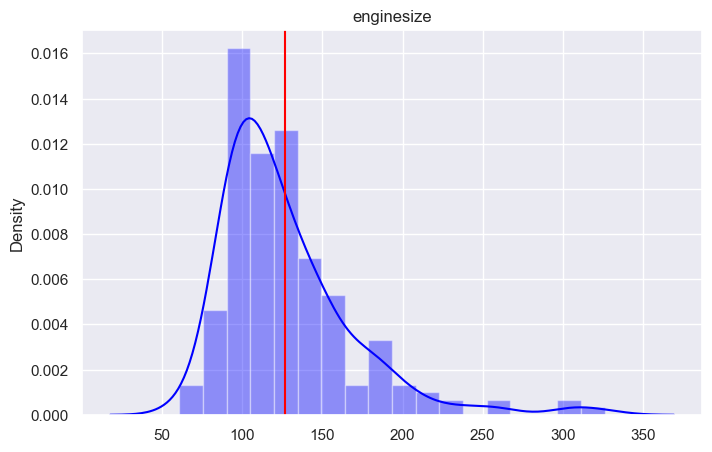

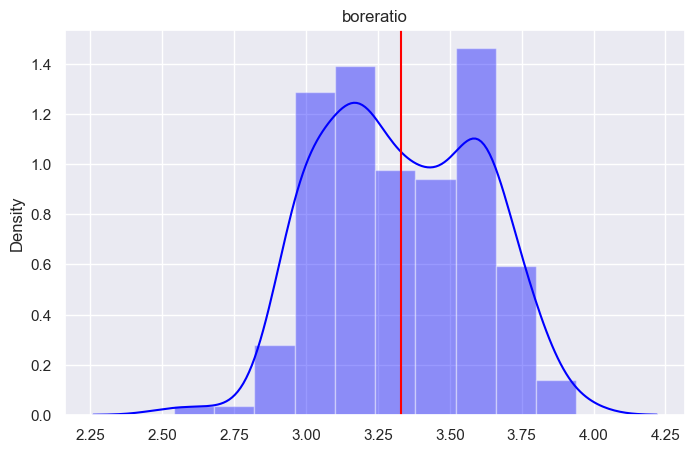

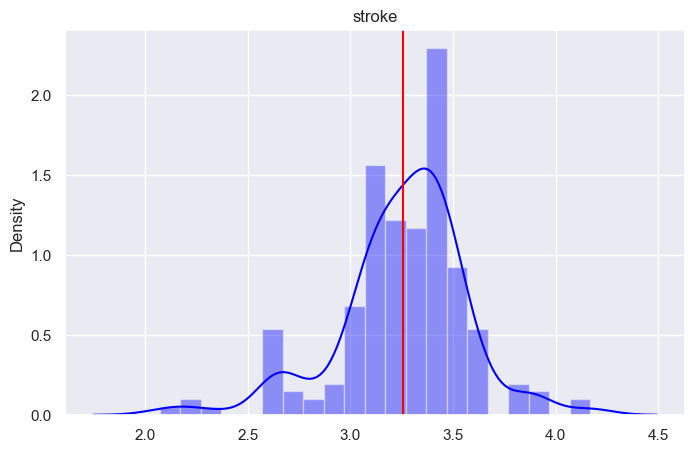

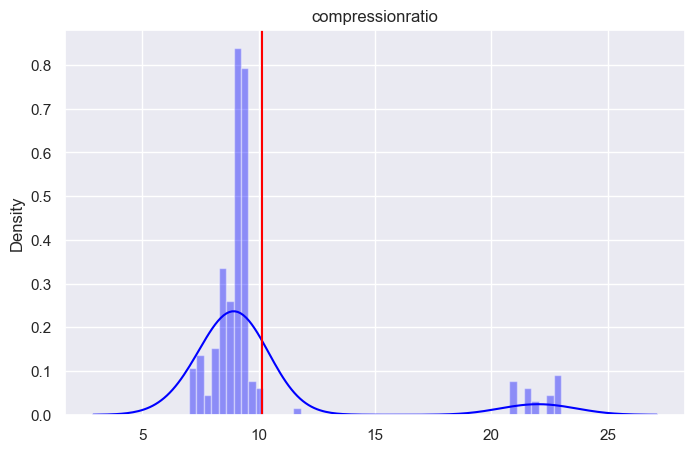

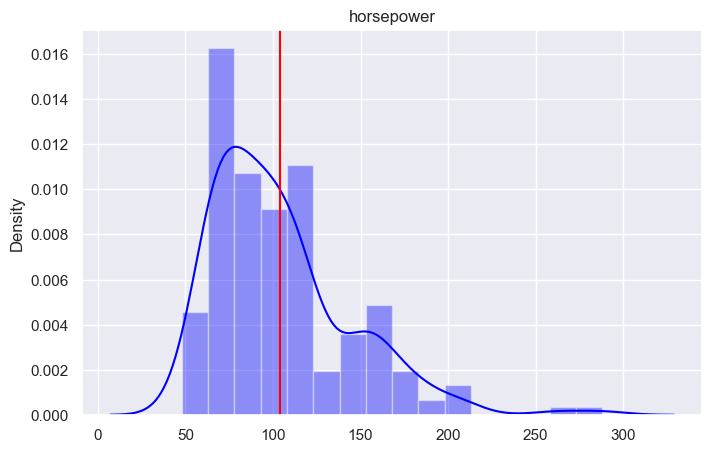

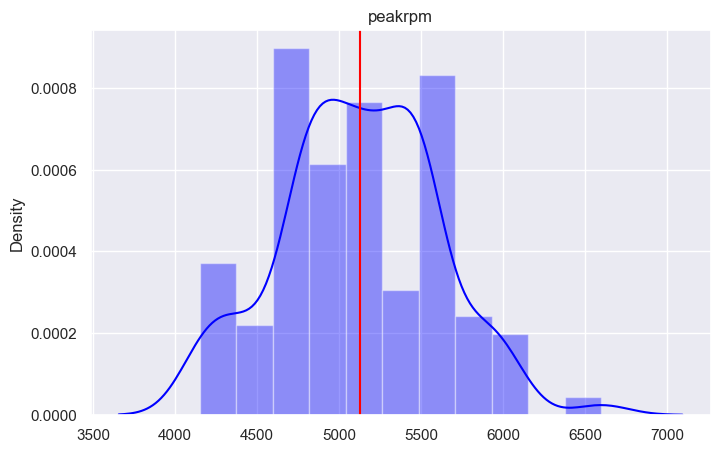

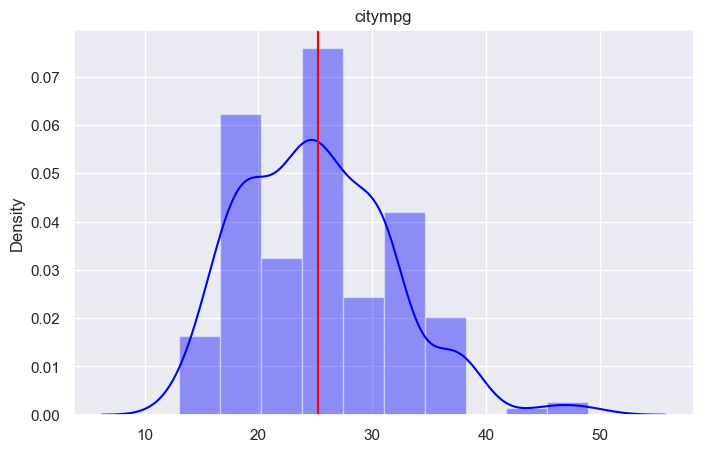

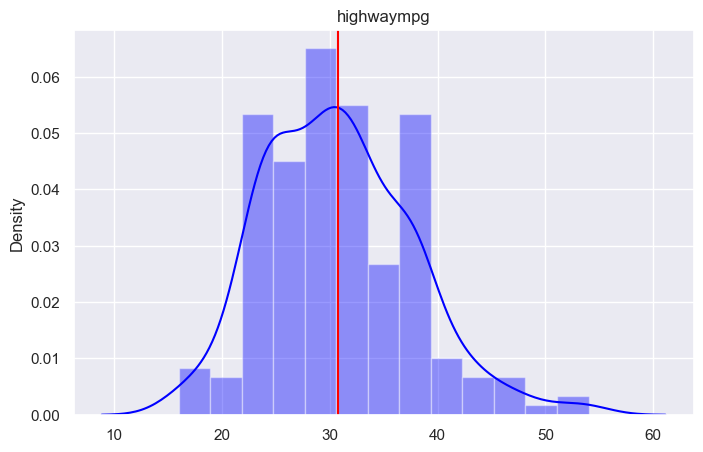

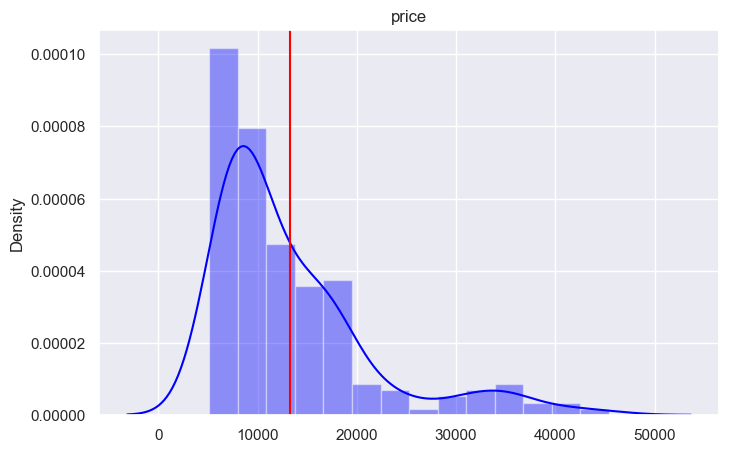

In [12]:
#8 - Investigating the distribution of all fields, adding the mean

# identifying all numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
n_variables = raw_data.select_dtypes(include=numerics).columns

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})


for n in n_variables:
    x = raw_data[n].values
    sns.distplot(x, color = 'blue');

    # Calculating the mean
    mean = raw_data[n].mean()

    #ploting the mean
    plt.axvline(mean, 0,1, color = 'red')
    plt.title(n)
    plt.show()

In [13]:
n_variables

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Investigating the distributon and outliers with Box plots

The meadian is:  10295.0


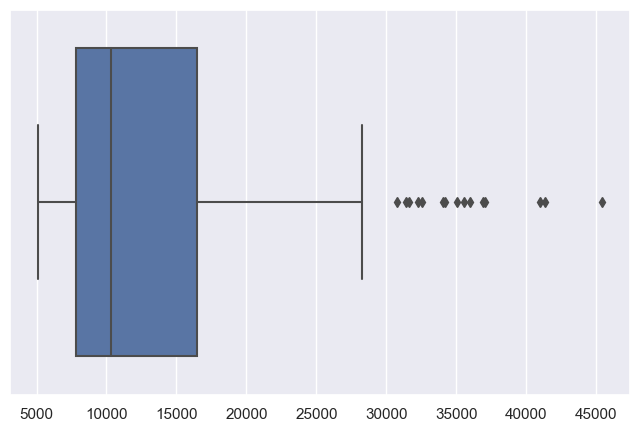

In [14]:
#9 - Investigating the distribution of Price

x = raw_data['price'].values
ax = sns.boxplot(x)

print('The meadian is: ', raw_data['price'].median())

# Notes:
# The line signifies the median
# The box in the middle show the beginning of Q1 (25th percentile) and the end of the Q3 (75th percentile)
# The whiskers (left - right) show the minimum quartile and maximum quartile
# The dots on the right are "outliers"

The meadian is:  103.0


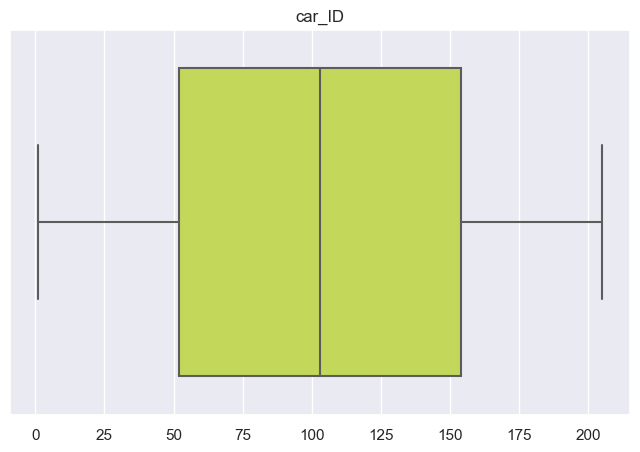

The meadian is:  1.0


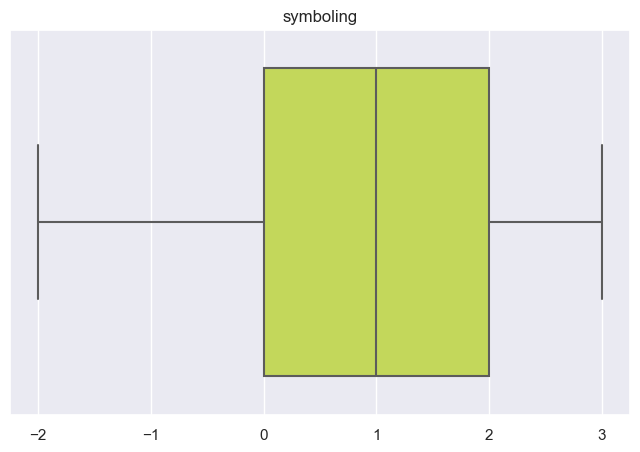

The meadian is:  97.0


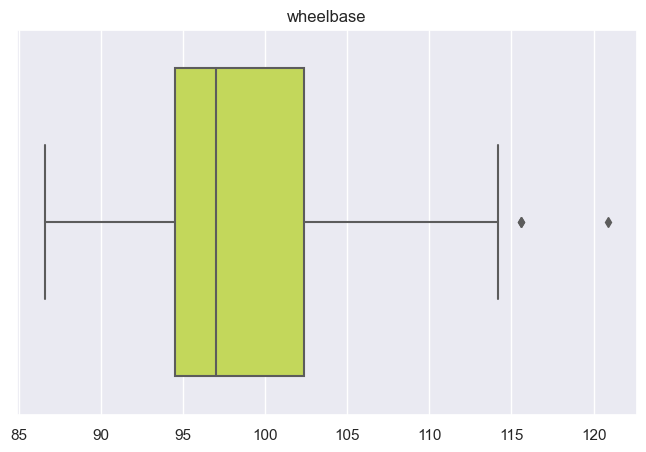

The meadian is:  173.2


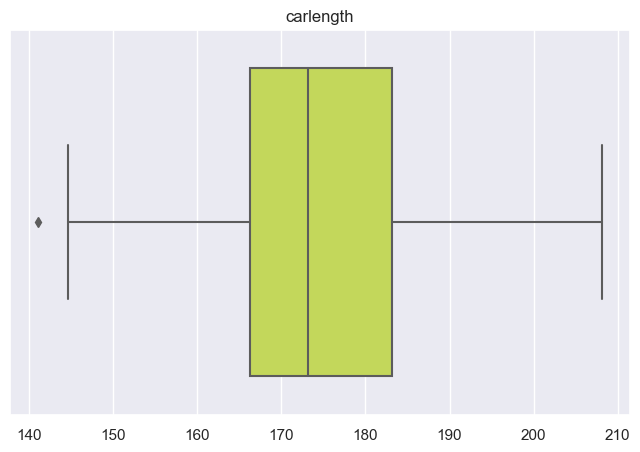

The meadian is:  65.5


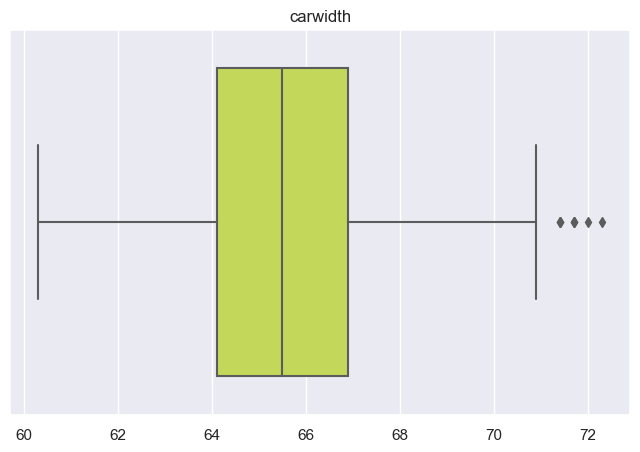

The meadian is:  54.1


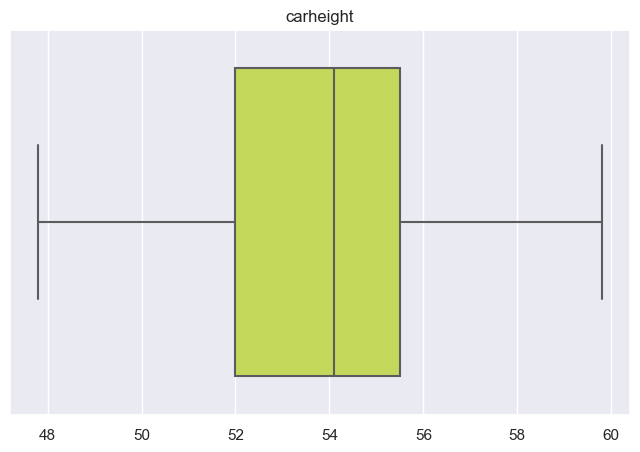

The meadian is:  2414.0


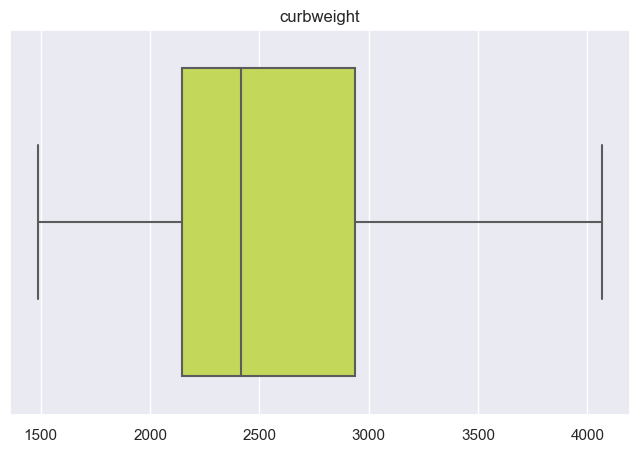

The meadian is:  120.0


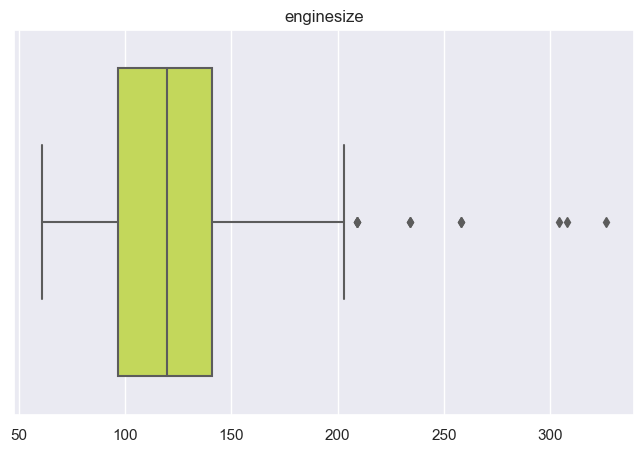

The meadian is:  3.31


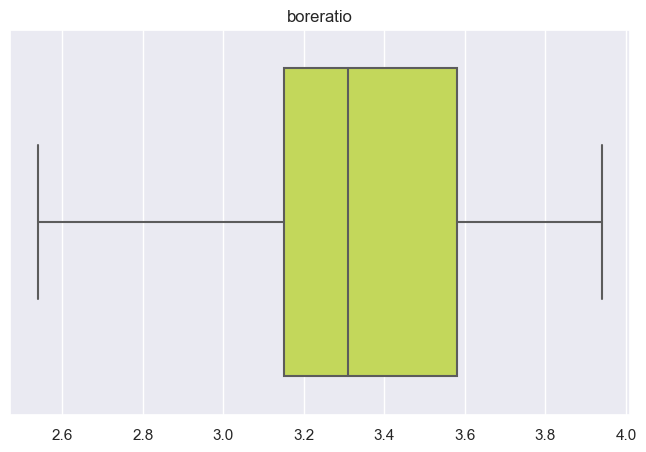

The meadian is:  3.29


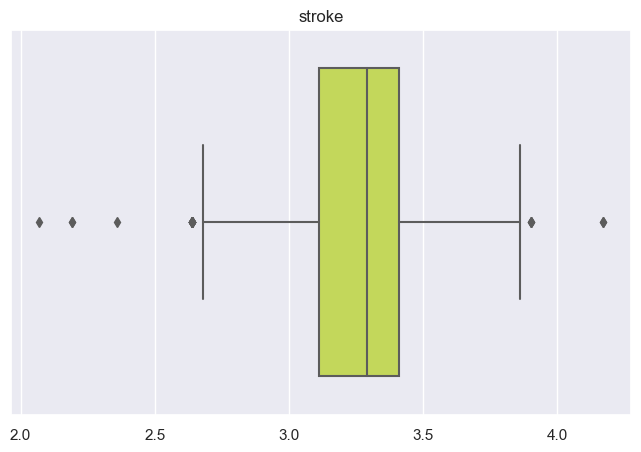

The meadian is:  9.0


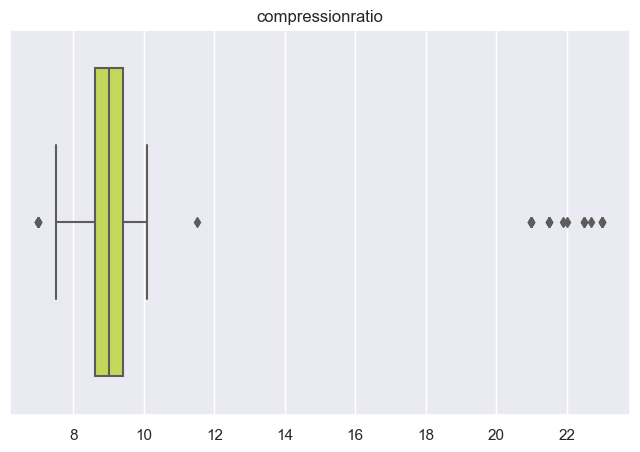

The meadian is:  95.0


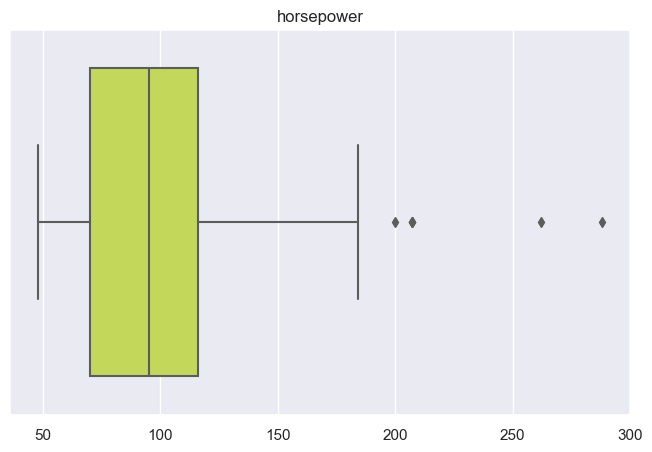

The meadian is:  5200.0


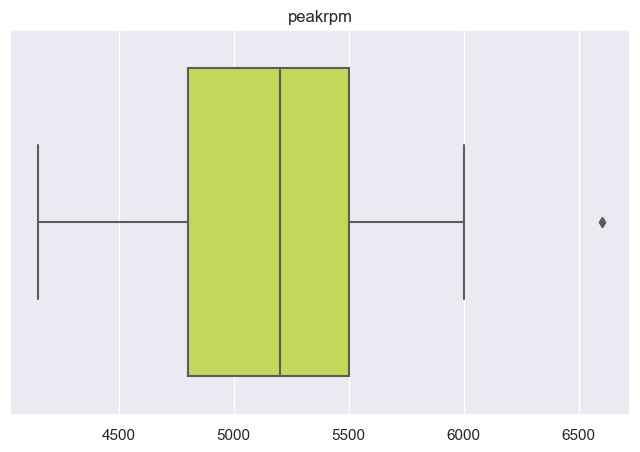

The meadian is:  24.0


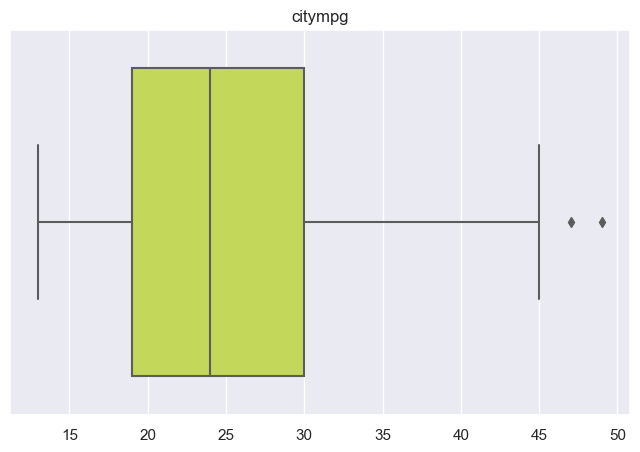

The meadian is:  30.0


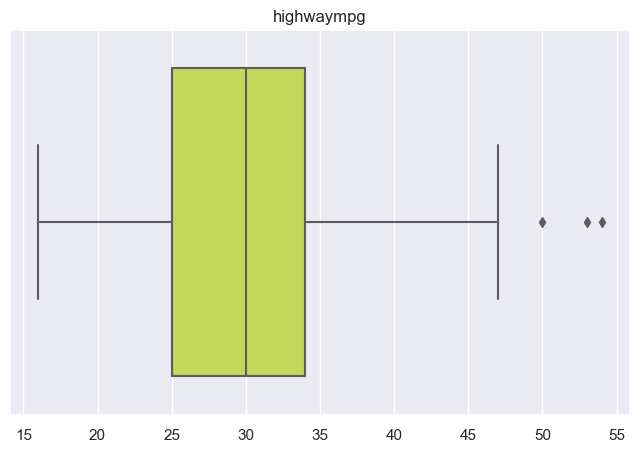

The meadian is:  10295.0


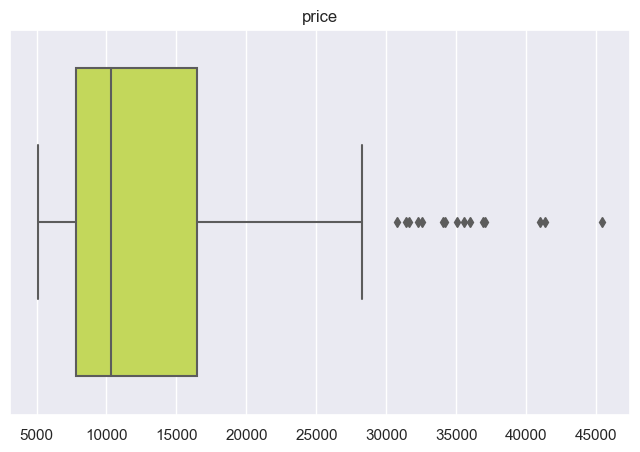

In [15]:
#10 - Investigating the distribution of all Numerical values

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in n_variables:    
    x = raw_data[c].values
    ax = sns.boxplot(x, color = '#D1EC46')
    print('The meadian is: ', raw_data[c].median())
    plt.title(c)
    plt.show()

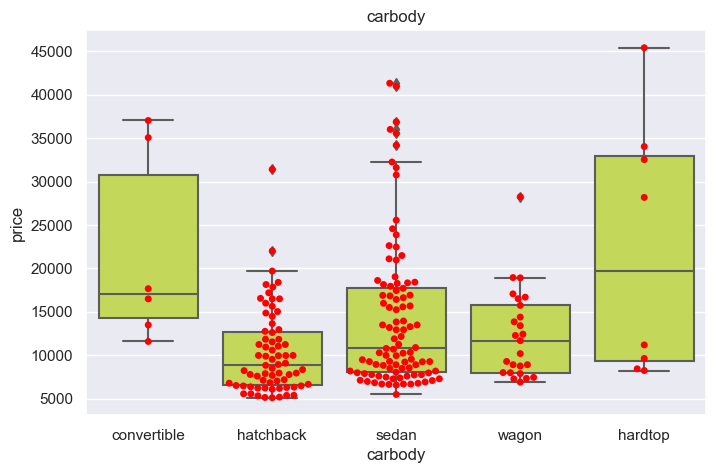

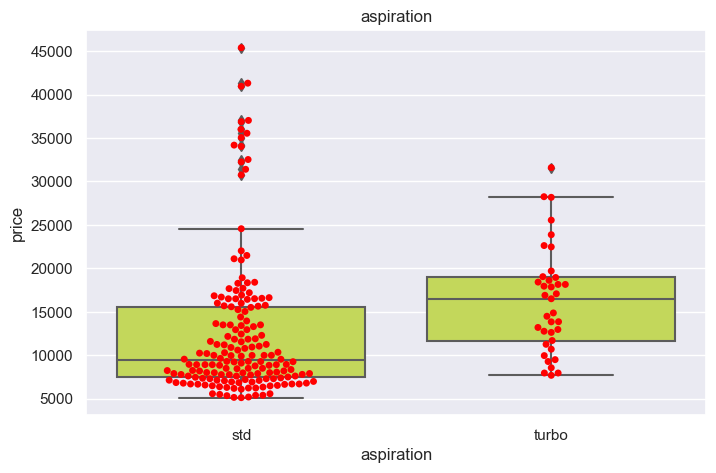

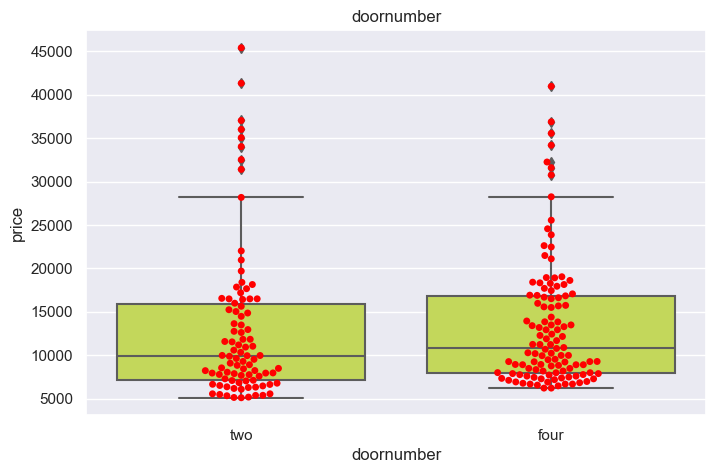

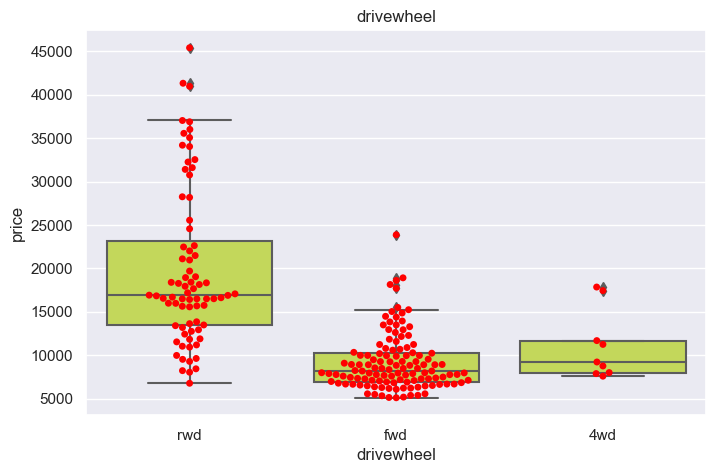

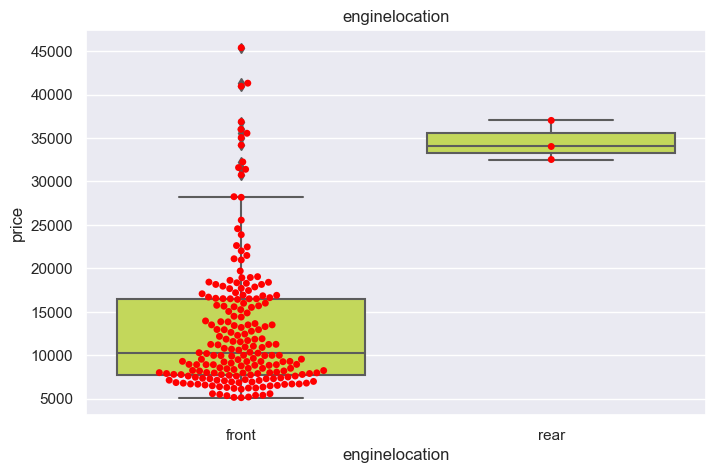

C:\Users\Latitude\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


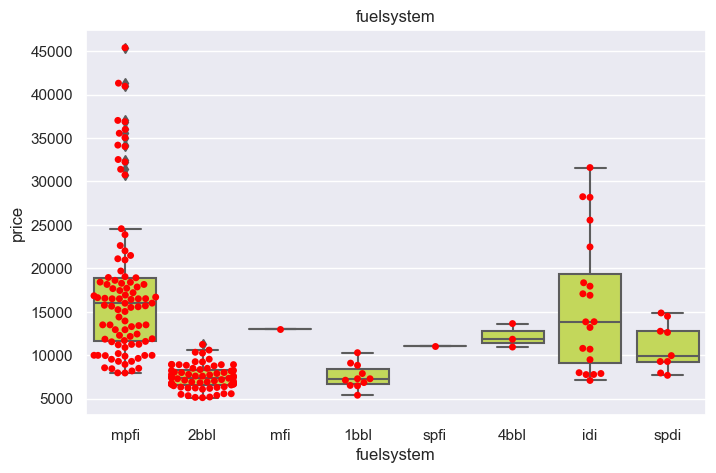

C:\Users\Latitude\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


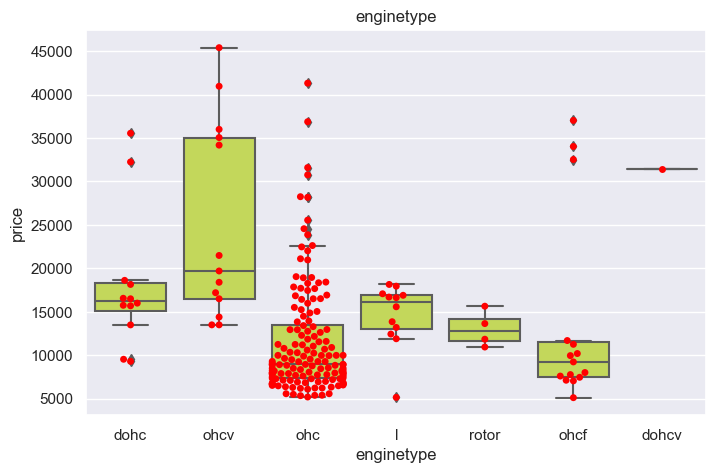

C:\Users\Latitude\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


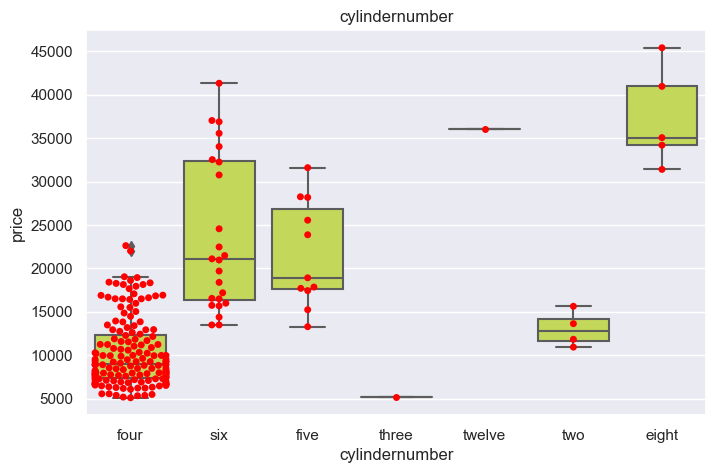

In [16]:
#11 - Investigating the distribution of price by categorical variables - by data points

categories = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype','cylindernumber']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in categories:
    ax = sns.boxplot(x=c, y="price", data=raw_data, color = '#D1EC46')
    ax = sns.swarmplot(x=c, y="price", data=raw_data, color="red")
    plt.title(c)
    plt.show()

# Converting Categorical values into Numerical Representation

In [17]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [18]:
raw_data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [19]:
# Making categorical variables into numeric representation

new_raw_data = pd.get_dummies(raw_data, columns = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype', 'fueltype'])
new_raw_data.head()

car_ID  symboling                   CarName  wheelbase  carlength  \
0       1          3        alfa-romero giulia       88.6      168.8   
1       2          3       alfa-romero stelvio       88.6      168.8   
2       3          1  alfa-romero Quadrifoglio       94.5      171.2   
3       4          2               audi 100 ls       99.8      176.6   
4       5          2                audi 100ls       99.4      176.6   

   carwidth  carheight  curbweight cylindernumber  enginesize  boreratio  \
0      64.1       48.8        2548           four         130       3.47   
1      64.1       48.8        2548           four         130       3.47   
2      65.5       52.4        2823            six         152       2.68   
3      66.2       54.3        2337           four         109       3.19   
4      66.4       54.3        2824           five         136       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0    2.68               9.0         111     5000       21          27   
1    2.68               9.0         111     5000       21          27   
2    3.47               9.0         154     5000       19          26   
3    3.40              10.0         102     5500       24          30   
4    3.40               8.0         115     5500       18          22   

     price  carbody_convertible  carbody_hardtop  carbody_hatchback  \
0  13495.0                    1                0                  0   
1  16500.0                    1                0                  0   
2  16500.0                    0                0                  1   
3  13950.0                    0                0                  0   
4  17450.0                    0                0                  0   

   carbody_sedan  carbody_wagon  aspiration_std  aspiration_turbo  \
0              0              0               1                 0   
1              0              0               1                 0   
2              0              0               1                 0   
3              1              0               1                 0   
4              1              0               1                 0   

   doornumber_four  doornumber_two  drivewheel_4wd  drivewheel_fwd  \
0                0               1               0               0   
1                0               1               0               0   
2                0               1               0               0   
3                1               0               0               1   
4                1               0               1               0   

   drivewheel_rwd  enginelocation_front  enginelocation_rear  fuelsystem_1bbl  \
0               1                     1                    0                0   
1               1                     1                    0                0   
2               1                     1                    0                0   
3               0                     1                    0                0   
4               0                     1                    0                0   

   fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  \
0                0                0               0               0   
1                0                0               0               0   
2                0                0               0               0   
3                0                0               0               0   
4                0                0               0               0   

   fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  enginetype_dohc  \
0                1                0                0                1   
1                1                0                0                1   
2                1                0                0                0   
3                1                0                0                0   
4                1                0                0                0   

   enginetype_dohcv  enginetype_l  enginetype_ohc  enginet

In [20]:
# Making categorical variables into numeric representation

new_raw_data = pd.get_dummies(raw_data, columns = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype', 'fueltype'])

new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'two'] = 2
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'three'] = 3
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'four'] = 4
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'five'] = 5
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'six'] = 6
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'eight'] = 8
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'twelve'] = 12
new_raw_data['cylindernumber'] = new_raw_data['cylindernumber'].astype(int)

warnings.simplefilter(action='ignore', category=FutureWarning)

new_raw_data.dtypes

C:\Users\Latitude\AppData\Local\Temp\ipykernel_7408\2273169823.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'two'] = 2
C:\Users\Latitude\AppData\Local\Temp\ipykernel_7408\2273169823.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'three'] = 3
C:\Users\Latitude\AppData\Local\Temp\ipykernel_7408\2273169823.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

car_ID                    int64
symboling                 int64
CarName                  object
wheelbase               float64
carlength               float64
carwidth                float64
carheight               float64
curbweight                int64
cylindernumber            int32
enginesize                int64
boreratio               float64
stroke                  float64
compressionratio        float64
horsepower                int64
peakrpm                   int64
citympg                   int64
highwaympg                int64
price                   float64
carbody_convertible       uint8
carbody_hardtop           uint8
carbody_hatchback         uint8
carbody_sedan             uint8
carbody_wagon             uint8
aspiration_std            uint8
aspiration_turbo          uint8
doornumber_four           uint8
doornumber_two            uint8
drivewheel_4wd            uint8
drivewheel_fwd            uint8
drivewheel_rwd            uint8
enginelocation_front      uint8
enginelo

In [21]:
new_raw_data.head()

car_ID  symboling                   CarName  wheelbase  carlength  \
0       1          3        alfa-romero giulia       88.6      168.8   
1       2          3       alfa-romero stelvio       88.6      168.8   
2       3          1  alfa-romero Quadrifoglio       94.5      171.2   
3       4          2               audi 100 ls       99.8      176.6   
4       5          2                audi 100ls       99.4      176.6   

   carwidth  carheight  curbweight  cylindernumber  enginesize  boreratio  \
0      64.1       48.8        2548               4         130       3.47   
1      64.1       48.8        2548               4         130       3.47   
2      65.5       52.4        2823               6         152       2.68   
3      66.2       54.3        2337               4         109       3.19   
4      66.4       54.3        2824               5         136       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0    2.68               9.0         111     5000       21          27   
1    2.68               9.0         111     5000       21          27   
2    3.47               9.0         154     5000       19          26   
3    3.40              10.0         102     5500       24          30   
4    3.40               8.0         115     5500       18          22   

     price  carbody_convertible  carbody_hardtop  carbody_hatchback  \
0  13495.0                    1                0                  0   
1  16500.0                    1                0                  0   
2  16500.0                    0                0                  1   
3  13950.0                    0                0                  0   
4  17450.0                    0                0                  0   

   carbody_sedan  carbody_wagon  aspiration_std  aspiration_turbo  \
0              0              0               1                 0   
1              0              0               1                 0   
2              0              0               1                 0   
3              1              0               1                 0   
4              1              0               1                 0   

   doornumber_four  doornumber_two  drivewheel_4wd  drivewheel_fwd  \
0                0               1               0               0   
1                0               1               0               0   
2                0               1               0               0   
3                1               0               0               1   
4                1               0               1               0   

   drivewheel_rwd  enginelocation_front  enginelocation_rear  fuelsystem_1bbl  \
0               1                     1                    0                0   
1               1                     1                    0                0   
2               1                     1                    0                0   
3               0                     1                    0                0   
4               0                     1                    0                0   

   fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  \
0                0                0               0               0   
1                0                0               0               0   
2                0                0               0               0   
3                0                0               0               0   
4                0                0               0               0   

   fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  enginetype_dohc  \
0                1                0                0                1   
1                1                0                0                1   
2                1                0                0                0   
3                1                0                0                0   
4                1                0                0                0   

   enginetype_dohcv  enginetype_l  enginetype_ohc  e

# Selecting the important features

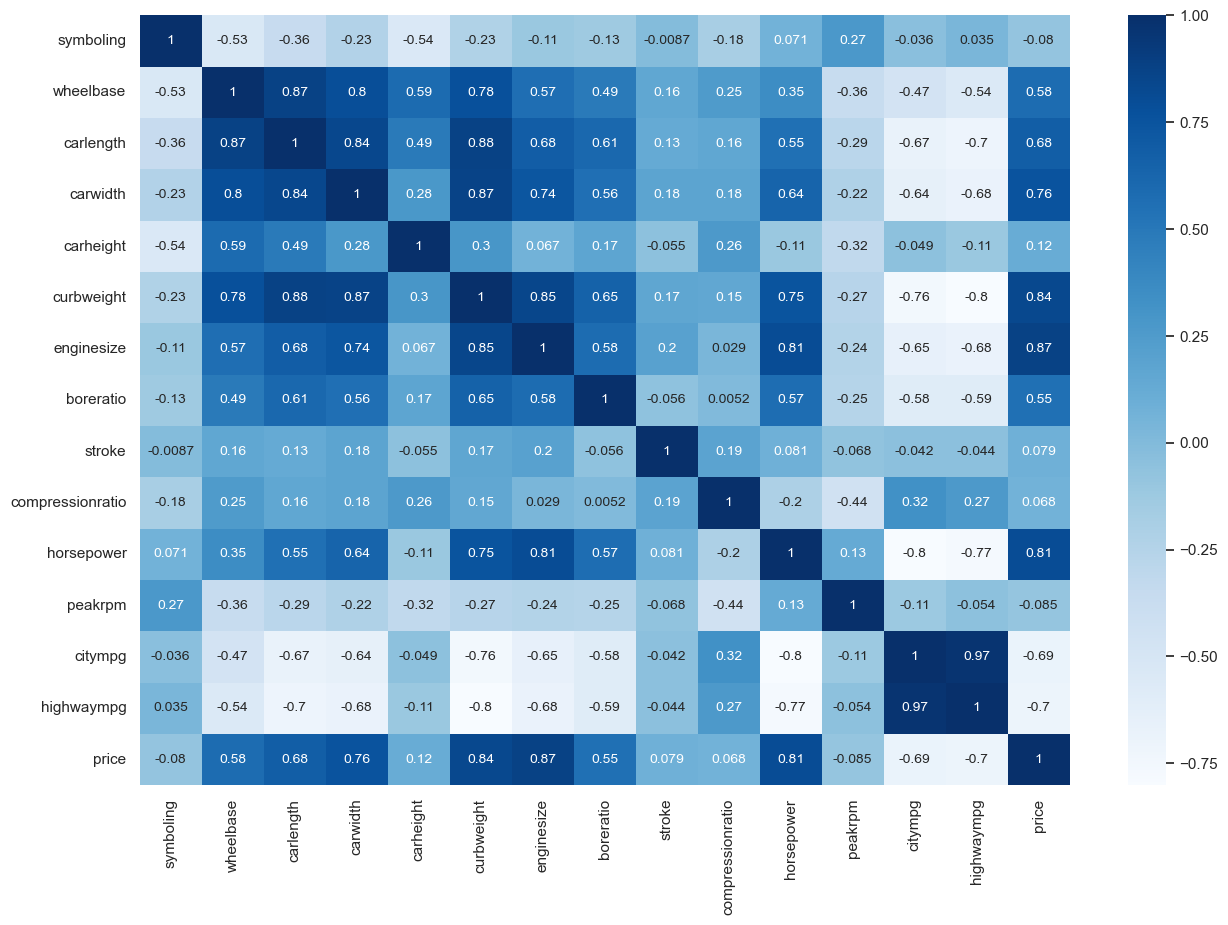

In [57]:
# Example 12 - Heatmap 

# droping columns we don't need
#del new_raw_data['car_ID']
#del new_raw_data['CarName']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(15,10)})

n_variables = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

pc = new_raw_data[n_variables].corr(method ='pearson')

cols = n_variables

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 cmap="Blues")

In [23]:
new_raw_data.dtypes

car_ID                    int64
symboling                 int64
wheelbase               float64
carlength               float64
carwidth                float64
carheight               float64
curbweight                int64
cylindernumber            int32
enginesize                int64
boreratio               float64
stroke                  float64
compressionratio        float64
horsepower                int64
peakrpm                   int64
citympg                   int64
highwaympg                int64
price                   float64
carbody_convertible       uint8
carbody_hardtop           uint8
carbody_hatchback         uint8
carbody_sedan             uint8
carbody_wagon             uint8
aspiration_std            uint8
aspiration_turbo          uint8
doornumber_four           uint8
doornumber_two            uint8
drivewheel_4wd            uint8
drivewheel_fwd            uint8
drivewheel_rwd            uint8
enginelocation_front      uint8
enginelocation_rear       uint8
fuelsyst

# Feature Importance


Steps to run Feature Importance

1. Split the data into x & y
2. Run a Tree-Based estimators (i.e. Decision Tree & Random Forest)
3. Run Feature Importance

In [24]:
# Split the data into X & y

X = new_raw_data.drop(['price'], axis = 1).values
X_columns = new_raw_data.drop(['price'], axis = 1)
y = new_raw_data['price'].astype(int)

print(X.shape)
print(y.shape)

(205, 47)
(205,)


In [25]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [26]:
dt.feature_importances_

array([0.067097, 0.008362, 0.106282, 0.057973, 0.039068, 0.110696,
       0.241150, 0.001786, 0.053168, 0.004961, 0.016314, 0.008851,
       0.094566, 0.014268, 0.014436, 0.048669, 0.000000, 0.005677,
       0.011418, 0.001297, 0.009659, 0.001297, 0.012283, 0.017902,
       0.006655, 0.000000, 0.009690, 0.003890, 0.003890, 0.000000,
       0.000000, 0.004934, 0.000000, 0.008393, 0.000000, 0.003083,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.009690,
       0.000000, 0.000000, 0.000000, 0.000000, 0.002594])

In [27]:
#del final_fi

# Calculating FI
for i, column in enumerate(new_raw_data.drop('price', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature car_ID:, 0.067
Importance of feature symboling:, 0.008
Importance of feature wheelbase:, 0.106
Importance of feature carlength:, 0.058
Importance of feature carwidth:, 0.039
Importance of feature carheight:, 0.111
Importance of feature curbweight:, 0.241
Importance of feature cylindernumber:, 0.002
Importance of feature enginesize:, 0.053
Importance of feature boreratio:, 0.005
Importance of feature stroke:, 0.016
Importance of feature compressionratio:, 0.009
Importance of feature horsepower:, 0.095
Importance of feature peakrpm:, 0.014
Importance of feature citympg:, 0.014
Importance of feature highwaympg:, 0.049
Importance of feature carbody_convertible:, 0.000
Importance of feature carbody_hardtop:, 0.006
Importance of feature carbody_hatchback:, 0.011
Importance of feature carbody_sedan:, 0.001
Importance of feature carbody_wagon:, 0.010
Importance of feature aspiration_std:, 0.001
Importance of feature aspiration_turbo:, 0.012
Importance of feature doornumbe

index              Variable  Feature Importance Score
0       6            curbweight                  0.241150
1       5             carheight                  0.110696
2       2             wheelbase                  0.106282
3      12            horsepower                  0.094566
4       0                car_ID                  0.067097
5       3             carlength                  0.057973
6       8            enginesize                  0.053168
7      15            highwaympg                  0.048669
8       4              carwidth                  0.039068
9      23       doornumber_four                  0.017902
10     10                stroke                  0.016314
11     14               citympg                  0.014436
12     13               peakrpm                  0.014268
13     22      aspiration_turbo                  0.012283
14     18     carbody_hatchback                  0.011418
15     26        drivewheel_fwd                  0.009690
16     41        enginetype_ohc                  0.009690
17     20         carbody_wagon                  0.009659
18     11      compressionratio                  0.008851
19     33        fuelsystem_idi                  0.008393
20      1             symboling                  0.008362
21     24        doornumber_two                  0.006655
22     17       carbody_hardtop                  0.005677
23      9             boreratio                  0.004961
24     31       fuelsystem_2bbl                  0.004934
25     27        drivewheel_rwd                  0.003890
26     28  enginelocation_front                  0.003890
27     35       fuelsystem_mpfi                  0.003083
28     46          fueltype_gas                  0.002594
29      7        cylindernumber                  0.001786
30     19         carbody_sedan                  0.001297
31     21        aspiration_std                  0.001297
32     39      enginetype_dohcv                  0.000000
33     45       fueltype_diesel                  0.000000
34     44      enginetype_rotor                  0.000000
35     43       enginetype_ohcv                  0.000000
36     42       enginetype_ohcf                  0.000000
37     40          enginetype_l                  0.000000
38     25        drivewheel_4wd                  0.000000
39     38       enginetype_dohc                  0.000000
40     36       fuelsystem_spdi                  0.000000
41     34        fuelsystem_mfi                  0.000000
42     16   carbody_convertible                  0.000000
43     32       fuelsystem_4bbl                  0.000000
44     30       fuelsystem_1bbl                  0.000000
45     29   enginelocation_rear                  0.000000
46     37       fuelsystem_spfi                  0.000000

# Splitting the Raw Data - Hold-Out Validation

In [28]:
# Hold-out validation

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(164, 47)
(41, 47)
(164,)
(41,)


In [29]:
# Training the Regression

lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)

In [30]:
# Model Accuracy on training dataset

print('The Accuracy  on the training dataset is: ', lm.score(X_train, y_train) )
print('The Accuracy r2  on the training dataset prediction is: ',r2_score(y_train,y_pred) )   

print("")
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm.score(X_test, y_test) )

print("")
# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm.predict(X_test))))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm.predict(X_test)))


print("")
# Coefficients
print('Coefficients: ', lm.coef_ )

print("")
# The Intercept
print('Intercept: ', lm.intercept_)

The Accuracy  on the training dataset is:  0.939012854622914
The Accuracy r2  on the training dataset prediction is:  0.939012854622914

The Accuracy  on the testing dataset is:  0.8508618050906757

The RMSE  on the training dataset is:  1943.8483950356274
The RMSE  on the testing dataset is:  3224.51796938918

The MAE  on the training dataset is:  1422.0261986002433
The MAE  on the testing dataset is:  2273.4706752812954

Coefficients:  [-15.330950 310.151322 59.886408 -29.377917 546.770707 323.313594 5.310580
 -1430.395287 176.711113 -8126.107835 -5483.145262 -786.406633 13.581598
 2.554469 -10.337758 212.293090 3085.668953 -1977.929992 157.227140
 136.622407 -1401.588508 -633.439236 633.439236 170.495715 -170.495715
 -721.843059 -891.009633 1612.852691 -4227.250691 4227.250691 -1039.568450
 752.677402 650.137888 3709.099959 -2488.091529 1313.157971 -1376.357399
 -1521.055842 -2566.560595 3601.273250 -3836.289677 972.667940 2115.205993
 -5921.093144 5634.796234 3709.099959 -3709.0999

In [31]:
new_raw_data.head()

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   
4       5          2       99.4      176.6      66.4       54.3        2824   

   cylindernumber  enginesize  boreratio  stroke  compressionratio  \
0               4         130       3.47    2.68               9.0   
1               4         130       3.47    2.68               9.0   
2               6         152       2.68    3.47               9.0   
3               4         109       3.19    3.40              10.0   
4               5         136       3.19    3.40               8.0   

   horsepower  peakrpm  citympg  highwaympg    price  carbody_convertible  \
0         111     5000       21          27  13495.0                    1   
1         111     5000       21          27  16500.0                    1   
2         154     5000       19          26  16500.0                    0   
3         102     5500       24          30  13950.0                    0   
4         115     5500       18          22  17450.0                    0   

   carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \
0                0                  0              0              0   
1                0                  0              0              0   
2                0                  1              0              0   
3                0                  0              1              0   
4                0                  0              1              0   

   aspiration_std  aspiration_turbo  doornumber_four  doornumber_two  \
0               1                 0                0               1   
1               1                 0                0               1   
2               1                 0                0               1   
3               1                 0                1               0   
4               1                 0                1               0   

   drivewheel_4wd  drivewheel_fwd  drivewheel_rwd  enginelocation_front  \
0               0               0               1                     1   
1               0               0               1                     1   
2               0               0               1                     1   
3               0               1               0                     1   
4               1               0               0                     1   

   enginelocation_rear  fuelsystem_1bbl  fuelsystem_2bbl  fuelsystem_4bbl  \
0                    0                0                0                0   
1                    0                0                0                0   
2                    0                0                0                0   
3                    0                0                0                0   
4                    0                0                0                0   

   fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  \
0               0               0                1                0   
1               0               0                1                0   
2               0               0                1                0   
3               0               0                1                0   
4               0               0                1                0   

   fuelsystem_spfi  enginetype_dohc  enginetype_dohcv  enginetype_l  \
0                0                1                 0             0   
1                0                1                 0             0   
2                0                0                 0             0   
3                0                0                 0             0   
4                0                0                 0             0   

   enginetype_oh

# Trying Regression with less variables

In [32]:
final_fi['Variable'][0:10].values

array(['curbweight', 'carheight', 'wheelbase', 'horsepower', 'car_ID',
       'carlength', 'enginesize', 'highwaympg', 'carwidth',
       'doornumber_four'], dtype=object)

In [33]:
# Split the data into X & y

test1 = final_fi['Variable'][0:10].values

X2 = new_raw_data[test1].values
y2 = new_raw_data['price'].astype(int)

# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.80, test_size = 0.2, random_state=15)


print(X.shape)
print(y.shape)

lm2 = LinearRegression(fit_intercept = True)
lm2.fit(X_train, y_train)

y_pred = lm2.predict(X_train)

# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm2.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm2.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm2.predict(X_test)))

(205, 47)
(205,)
The Accuracy  on the testing dataset is:  0.8958963506004924
The RMSE  on the testing dataset is:  2694.0356437823825
The MAE  on the testing dataset is:  1987.0584138537731


In [34]:
y2

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: int32

# Trying the Recursive Feature Elimination Process

In [35]:
# with Linear Regression (lm = using first column)

from sklearn.feature_selection import RFE

selector = RFE(lm, n_features_to_select=10, step=1)
selector = selector.fit(X, y)
selector.support_

print('Chosen best 10 feature by rfe:',X_columns.columns[selector.support_])

rfe_lr = X_columns.columns[selector.support_]


Chosen best 10 feature by rfe: Index(['carwidth', 'carbody_convertible', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'fuelsystem_4bbl',
       'fuelsystem_spfi', 'enginetype_dohc', 'enginetype_l',
       'enginetype_ohcv'],
      dtype='object')


In [36]:
rfe_lr

Index(['carwidth', 'carbody_convertible', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'fuelsystem_4bbl',
       'fuelsystem_spfi', 'enginetype_dohc', 'enginetype_l',
       'enginetype_ohcv'],
      dtype='object')

In [37]:
# Split the data into X & y

test1 = rfe_lr

X2 = new_raw_data[test1].values
y2 = new_raw_data['price'].astype(int)

# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.80, test_size = 0.2, random_state=15)


print(X.shape)
print(y.shape)

lm2 = LinearRegression(fit_intercept = True)
lm2.fit(X_train, y_train)

y_pred = lm2.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm2.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm2.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm2.predict(X_test)))

(205, 47)
(205,)
The Accuracy  on the testing dataset is:  0.8226144299201708
The RMSE  on the testing dataset is:  3516.6528965468415
The MAE  on the testing dataset is:  2410.4047460752363


In [38]:
# With Support vector regressor

from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X, y)
selector.support_
print('Chosen best 10 feature by rfe:',X_columns.columns[selector.support_])

rfe_svr = X_columns.columns[selector.support_]

Chosen best 10 feature by rfe: Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'enginesize',
       'compressionratio', 'horsepower', 'carbody_hatchback', 'drivewheel_fwd',
       'drivewheel_rwd'],
      dtype='object')


In [39]:
# Split the data into X & y

test1 = rfe_svr

X2 = new_raw_data[test1].values
y2 = new_raw_data['price'].astype(int)

# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.80, test_size = 0.2, random_state=15)


print(X.shape)
print(y.shape)

lm2 = LinearRegression(fit_intercept = True)
lm2.fit(X_train, y_train)

y_pred = lm2.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm2.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm2.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm2.predict(X_test)))

(205, 47)
(205,)
The Accuracy  on the testing dataset is:  0.896248151908999
The RMSE  on the testing dataset is:  2689.4797644714727
The MAE  on the testing dataset is:  2045.5119192674817


# Trying other Models

## Random Forest Model

In [40]:
from sklearn.ensemble import RandomForestRegressor

# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', regr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,regr.predict(X_test)))


The Accuracy  on the testing dataset is:  0.87857909726018
The RMSE  on the testing dataset is:  2909.4914752165437
The MAE  on the testing dataset is:  2121.1311847103157


In [41]:
# Optimizing Random Forest R

from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search = GridSearchCV(estimator = regr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [42]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=1000, random_state=0)

In [43]:
best_grid = grid_search.best_estimator_

regr = best_grid
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', regr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,regr.predict(X_test)))

The Accuracy  on the testing dataset is:  0.8791273338526945
The RMSE  on the testing dataset is:  2902.9156128245904
The MAE  on the testing dataset is:  1662.0524670474829


## XG Boost Regressor 

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_train)

# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', reg.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,reg.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,reg.predict(X_test)))

The Accuracy  on the testing dataset is:  0.944538667933968
The RMSE  on the testing dataset is:  1966.3712165085378
The MAE  on the testing dataset is:  1374.4676099853177


In [45]:
pip install xgboost

In [46]:
# optimizing XGBoost Regressor

from sklearn.model_selection import GridSearchCV
import xgboost as xgb

params = { 'max_depth': [3,6,9,12],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

xgbr = xgb.XGBRegressor(seed = 20)

clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)

clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}


In [47]:
# Training the model on best parameters

xgbr = xgb.XGBRegressor(seed = 20, colsample_bytree = 0.7, learning_rate= 0.1, max_depth=12, n_estimators=500)
xgbr.fit(X_train, y_train)
xgbr

y_pred = xgbr.predict(X_train)
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', xgbr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,xgbr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,xgbr.predict(X_test)))

The Accuracy  on the testing dataset is:  0.9458283000245309
The RMSE  on the testing dataset is:  1943.3749150373783
The MAE  on the testing dataset is:  1242.6066239519816


# Conclusion: XGBoost Regressor without optimization gave the Best Results

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

# Split the data into X & y

#del new_raw_data['Price Predictions']

X = new_raw_data.drop(['price'], axis = 1).values
X_columns = new_raw_data.drop(['price'], axis = 1)
y = new_raw_data['price'].astype(int)

print(X.shape)
print(y.shape)

# Hold-out validation

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_train)

# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', reg.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,reg.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,reg.predict(X_test)))

(205, 47)
(205,)
(164, 47)
(41, 47)
(164,)
(41,)
The Accuracy  on the testing dataset is:  0.944538667933968
The RMSE  on the testing dataset is:  1966.3712165085378
The MAE  on the testing dataset is:  1374.4676099853177


In [49]:
X_train.shape

(164, 47)

In [50]:
y_pred.shape

(164,)

C:\Users\Latitude\AppData\Local\Temp\ipykernel_7408\1073521889.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)


Text(0.5, 1.0, 'Actuals Vs Predicted Values')

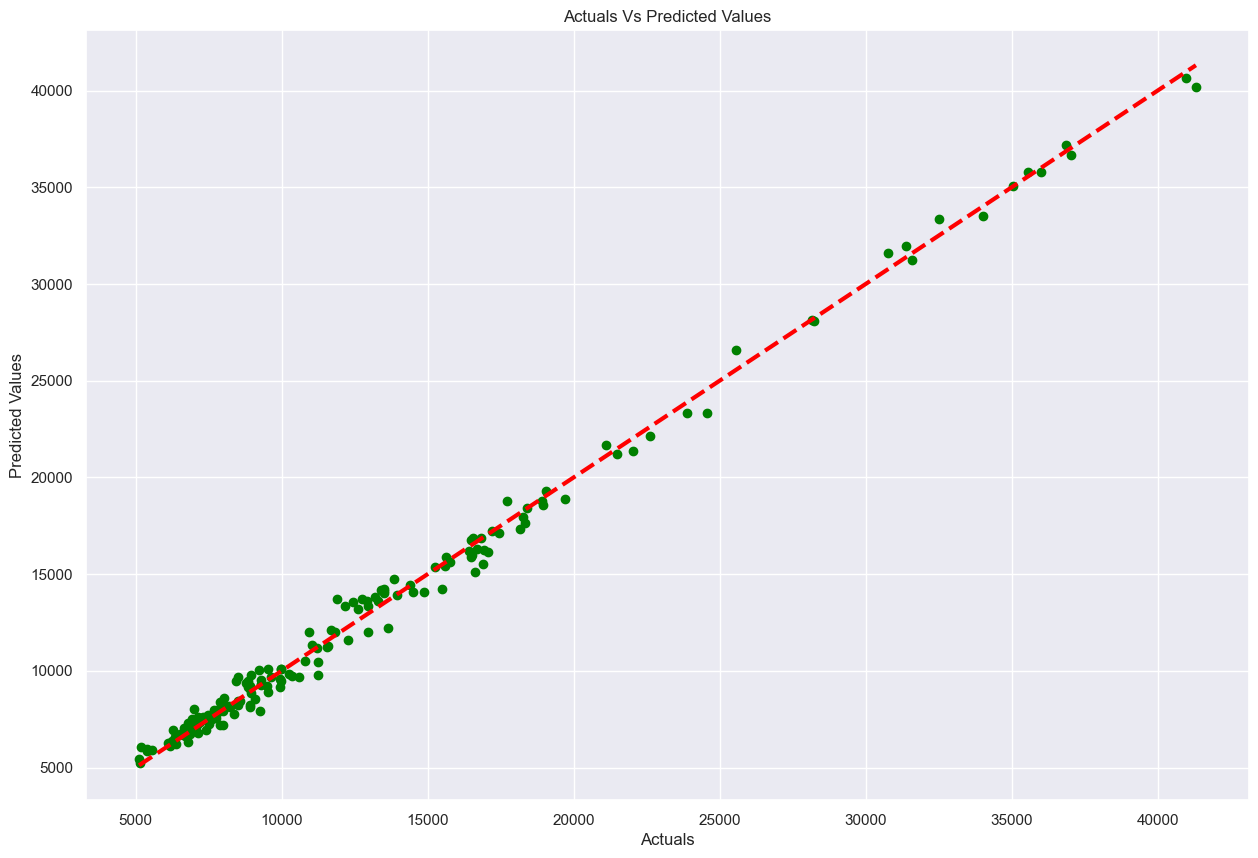

In [51]:
# Plotting Actuals Vs Predicted

plt.figure(figsize=(15,10))

plt.scatter(y_train, y_pred, c='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')
# increase size

# Joining the Original Dataset with the Predictions

In [52]:
# Fixing the train df
final_df = pd.DataFrame(X_train, columns = X_columns.columns)
final_df['Price'] = y_train.values
final_df['Phase'] = 'Existing data'
final_df['Price Predictions'] = y_pred
print(final_df.shape)

# Fixing the test df
final_df2 = pd.DataFrame(X_test, columns = X_columns.columns)
final_df2['Price'] = y_test.values
final_df2['Phase'] = 'New unseen data'
final_df2['Price Predictions'] = reg.predict(X_test)
print(final_df2.shape)

# unioning them
final_df3 = pd.concat([final_df, final_df2], ignore_index = True)
print(final_df3.shape)
final_df3.head()


# Left Joining to the original dataset the predictions
raw_data['car_ID'] = raw_data['car_ID'].astype(int)
final_df3['car_ID'] = final_df3['car_ID'].astype(int)

final_df4 = raw_data.merge(final_df3[['car_ID','Phase','Price Predictions']], how = 'left', on = 'car_ID')
final_df4['CarName'] = final_df4['CarName'] + ' - ' + final_df4['car_ID'].astype(str)
print(final_df4.shape)
final_df4.head()

(164, 50)
(41, 50)
(205, 50)
(205, 28)


car_ID  symboling                       CarName fueltype aspiration  \
0       1          3        alfa-romero giulia - 1      gas        std   
1       2          3       alfa-romero stelvio - 2      gas        std   
2       3          1  alfa-romero Quadrifoglio - 3      gas        std   
3       4          2               audi 100 ls - 4      gas        std   
4       5          2                audi 100ls - 5      gas        std   

  doornumber      carbody drivewheel enginelocation  wheelbase  carlength  \
0        two  convertible        rwd          front       88.6      168.8   
1        two  convertible        rwd          front       88.6      168.8   
2        two    hatchback        rwd          front       94.5      171.2   
3       four        sedan        fwd          front       99.8      176.6   
4       four        sedan        4wd          front       99.4      176.6   

   carwidth  carheight  curbweight enginetype cylindernumber  enginesize  \
0      64.1       48.8        2548       dohc           four         130   
1      64.1       48.8        2548       dohc           four         130   
2      65.5       52.4        2823       ohcv            six         152   
3      66.2       54.3        2337        ohc           four         109   
4      66.4       54.3        2824        ohc           five         136   

  fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0       mpfi       3.47    2.68               9.0         111     5000   
1       mpfi       3.47    2.68               9.0         111     5000   
2       mpfi       2.68    3.47               9.0         154     5000   
3       mpfi       3.19    3.40              10.0         102     5500   
4       mpfi       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price            Phase  Price Predictions  
0       21          27  13495.0    Existing data       14030.631995  
1       21          27  16500.0    Existing data       15868.214832  
2       19          26  16500.0  New unseen data       16644.131234  
3       24          30  13950.0    Existing data       13923.215678  
4       18          22  17450.0    Existing data       17130.875554

In [53]:
# Exporting the data in a CSV
final_df4.to_csv('CarPrice_Assignment', sep='\t')

os. getcwd() 

'C:\\Users\\Latitude\\Python'